<center><font size=10>Data Science and Engineering</center></font>
<center><font size=6>CAR PRICE PREDICTION</center></font>

In [2]:
from PIL import Image

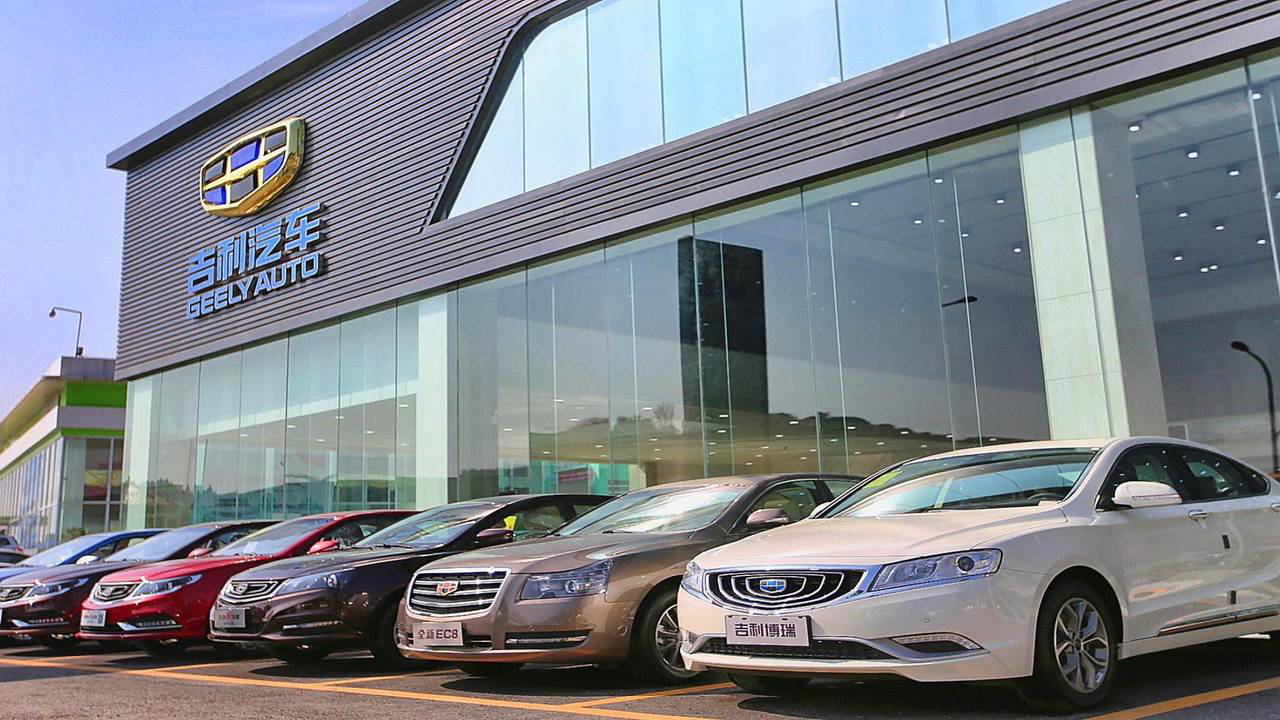

In [4]:
image = Image.open('geely-logo.jpg')
image

# Import The Necessary Libraries

In [3]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,cohen_kappa_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score,LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier,VotingRegressor,StackingClassifier,StackingRegressor
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)
# libraries to deploy the ML model
import os
import joblib
import pickle

### Attributes
1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky,-3 that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car

# Read The Data

In [6]:
data=pd.read_csv('car_prices.csv')
data

car_ID  symboling                          CarName fueltype aspiration  \
0         1          3               alfa-romero giulia      gas        std   
1         2          3              alfa-romero stelvio      gas        std   
2         3          1         alfa-romero Quadrifoglio      gas        std   
3         4          2                      audi 100 ls      gas        std   
4         5          2                       audi 100ls      gas        std   
5         6          2                         audi fox      gas        std   
6         7          1                       audi 100ls      gas        std   
7         8          1                        audi 5000      gas        std   
8         9          1                        audi 4000      gas      turbo   
9        10          0              audi 5000s (diesel)      gas      turbo   
10       11          2                         bmw 320i      gas        std   
11       12          0                         bmw 320i      gas        std   
12       13          0                           bmw x1      gas        std   
13       14          0                           bmw x3      gas        std   
14       15          1                           bmw z4      gas        std   
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
18       19          2                 chevrolet impala      gas        std   
19       20          1            chevrolet monte carlo      gas        std   
20       21          0              chevrolet vega 2300      gas        std   
21       22          1                    dodge rampage      gas        std   
22       23          1              dodge challenger se      gas        std   
23       24          1                       dodge d200      gas      turbo   
24       25          1                dodge monaco (sw)      gas        std   
25       26          1               dodge colt hardtop      gas        std   
26       27          1                  dodge colt (sw)      gas        std   
27       28          1             dodge coronet custom      gas      turbo   
28       29         -1                dodge dart custom      gas        std   
29       30          3        dodge coronet custom (sw)      gas      turbo   
30       31          2                      honda civic      gas        std   
31       32          2                 honda civic cvcc      gas        std   
32       33          1                      honda civic      gas        std   
33       34          1                honda accord cvcc      gas        std   
34       35          1                 honda civic cvcc      gas        std   
35       36          0                  honda accord lx      gas        std   
36       37          0              honda civic 1500 gl      gas        std   
37       38          0                     honda accord      gas        std   
38       39          0                 honda civic 1300      gas        std   
39       40          0                    honda prelude      gas        std   
40       41          0                     honda accord      gas        std   
41       42          0                      honda civic      gas        std   
42       43          1               honda civic (auto)      gas        std   
43       44          0                       isuzu MU-X      gas        std   
44       45          1                     isuzu D-Max       gas        std   
45       46          0              isuzu D-Max V-Cross      gas        std   
46       47          2                     isuzu D-Max       gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk

In [7]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Splitting Numerical And Categorical Data

In [9]:
# As car id and car name are redundant columns so we set car_id as index
data.set_index('car_ID',inplace=True)
data['CompanyName']=data['CarName'].apply(lambda x:x.split()[0])

In [10]:
data.drop(columns=['CarName'],inplace=True)

In [11]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
data

symboling fueltype aspiration doornumber      carbody drivewheel  \
car_ID                                                                     
1               3      gas        std        two  convertible        rwd   
2               3      gas        std        two  convertible        rwd   
3               1      gas        std        two    hatchback        rwd   
4               2      gas        std       four        sedan        fwd   
5               2      gas        std       four        sedan        4wd   
6               2      gas        std        two        sedan        fwd   
7               1      gas        std       four        sedan        fwd   
8               1      gas        std       four        wagon        fwd   
9               1      gas      turbo       four        sedan        fwd   
10              0      gas      turbo        two    hatchback        4wd   
11              2      gas        std        two        sedan        rwd   
12              0      gas        std       four        sedan        rwd   
13              0      gas        std        two        sedan        rwd   
14              0      gas        std       four        sedan        rwd   
15              1      gas        std       four        sedan        rwd   
16              0      gas        std       four        sedan        rwd   
17              0      gas        std        two        sedan        rwd   
18              0      gas        std       four        sedan        rwd   
19              2      gas        std        two    hatchback        fwd   
20              1      gas        std        two    hatchback        fwd   
21              0      gas        std       four        sedan        fwd   
22              1      gas        std        two    hatchback        fwd   
23              1      gas        std        two    hatchback        fwd   
24              1      gas      turbo        two    hatchback        fwd   
25              1      gas        std       four    hatchback        fwd   
26              1      gas        std       four        sedan        fwd   
27              1      gas        std       four        sedan        fwd   
28              1      gas      turbo        two        sedan        fwd   
29             -1      gas        std       four        wagon        fwd   
30              3      gas      turbo        two    hatchback        fwd   
31              2      gas        std        two    hatchback        fwd   
32              2      gas        std        two    hatchback        fwd   
33              1      gas        std        two    hatchback        fwd   
34              1      gas        std        two    hatchback        fwd   
35              1      gas        std        two    hatchback        fwd   
36              0      gas        std       four        sedan        fwd   
37              0      gas        std       four        wagon        fwd   
38              0      gas        std        two    hatchback        fwd   
39              0      gas        std        two    hatchback        fwd   
40              0      gas        std       four        sedan        fwd   
41              0      gas        std       four        sedan        fwd   
42              0      gas        std       four        sedan        fwd   
43              1      gas        std        two        sedan        fwd   
44              0      gas        std       four        sedan        rwd   
45              1      gas        std        two        sedan        fwd   
46              0      gas        std       four        sedan        fwd   
47              2      gas        std        two    hatchback        rwd   
48              0      gas        std       four        sedan        rwd   
49              0      gas        std       four        sedan        rwd   
50              0      gas        std        two        sedan        rwd   
51              1      gas        std        two    hatc

In [13]:
cat_cols=['symboling','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype',
          'cylindernumber','fuelsystem','CompanyName']

In [14]:
num_cols=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','stroke','horsepower','peakrpm',
          'citympg', 'highwaympg','price','boreratio','compressionratio']

# Five Point summary of Numerical columns

In [16]:
data[num_cols].describe().T

count     mean     std     min     25%      50%      75%  \
wheelbase        205.00    98.76    6.02   86.60   94.50    97.00   102.40   
carlength        205.00   174.05   12.34  141.10  166.30   173.20   183.10   
carwidth         205.00    65.91    2.15   60.30   64.10    65.50    66.90   
carheight        205.00    53.72    2.44   47.80   52.00    54.10    55.50   
curbweight       205.00  2555.57  520.68 1488.00 2145.00  2414.00  2935.00   
enginesize       205.00   126.91   41.64   61.00   97.00   120.00   141.00   
stroke           205.00     3.26    0.31    2.07    3.11     3.29     3.41   
horsepower       205.00   104.12   39.54   48.00   70.00    95.00   116.00   
peakrpm          205.00  5125.12  476.99 4150.00 4800.00  5200.00  5500.00   
citympg          205.00    25.22    6.54   13.00   19.00    24.00    30.00   
highwaympg       205.00    30.75    6.89   16.00   25.00    30.00    34.00   
price            205.00 13276.71 7988.85 5118.00 7788.00 10295.00 16503.00   
boreratio        205.00     3.33    0.27    2.54    3.15     3.31     3.58   
compressionratio 205.00    10.14    3.97    7.00    8.60     9.00     9.40   

                      max  
wheelbase          120.90  
carlength          208.10  
carwidth            72.30  
carheight           59.80  
curbweight        4066.00  
enginesize         326.00  
stroke               4.17  
horsepower         288.00  
peakrpm           6600.00  
citympg             49.00  
highwaympg          54.00  
price            45400.00  
boreratio            3.94  
compressionratio    23.00

In [17]:
for i in cat_cols:
    print(round(data[i].value_counts(normalize=True)*100))
    print()

symboling
 0   33.00
 1   26.00
 2   16.00
 3   13.00
-1   11.00
-2    1.00
Name: proportion, dtype: float64

fueltype
gas      90.00
diesel   10.00
Name: proportion, dtype: float64

aspiration
std     82.00
turbo   18.00
Name: proportion, dtype: float64

doornumber
four   56.00
two    44.00
Name: proportion, dtype: float64

carbody
sedan         47.00
hatchback     34.00
wagon         12.00
hardtop        4.00
convertible    3.00
Name: proportion, dtype: float64

drivewheel
fwd   59.00
rwd   37.00
4wd    4.00
Name: proportion, dtype: float64

enginelocation
front   99.00
rear     1.00
Name: proportion, dtype: float64

enginetype
ohc     72.00
ohcf     7.00
ohcv     6.00
dohc     6.00
l        6.00
rotor    2.00
dohcv    0.00
Name: proportion, dtype: float64

cylindernumber
four     78.00
six      12.00
five      5.00
eight     2.00
two       2.00
three     0.00
twelve    0.00
Name: proportion, dtype: float64

fuelsystem
mpfi   46.00
2bbl   32.00
idi    10.00
1bbl    5.00
spdi    4.00


# Correlation between Target variable and other features

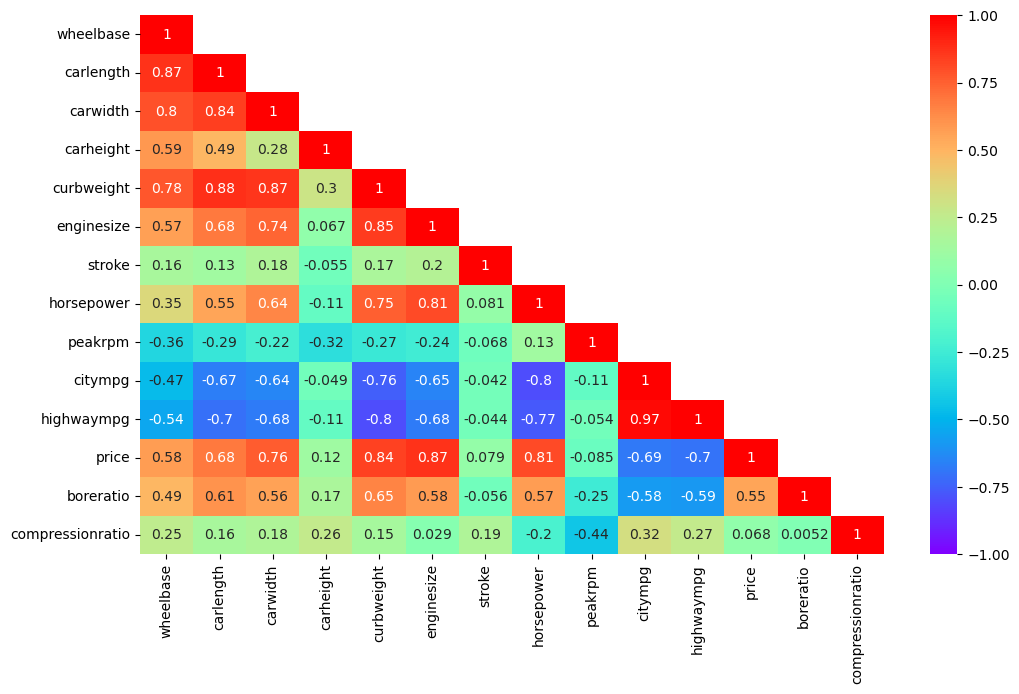

In [19]:
plt.figure(figsize=[12,7])
sns.heatmap(data[num_cols].corr(),annot=True,vmin=-1,vmax=1,cmap='rainbow',mask=np.triu(data[num_cols].corr(),k=1))
plt.show()

# Lets Do Exploratory Data Analysis (EDA)

## Univariate Analysis

### Numerical Analysis

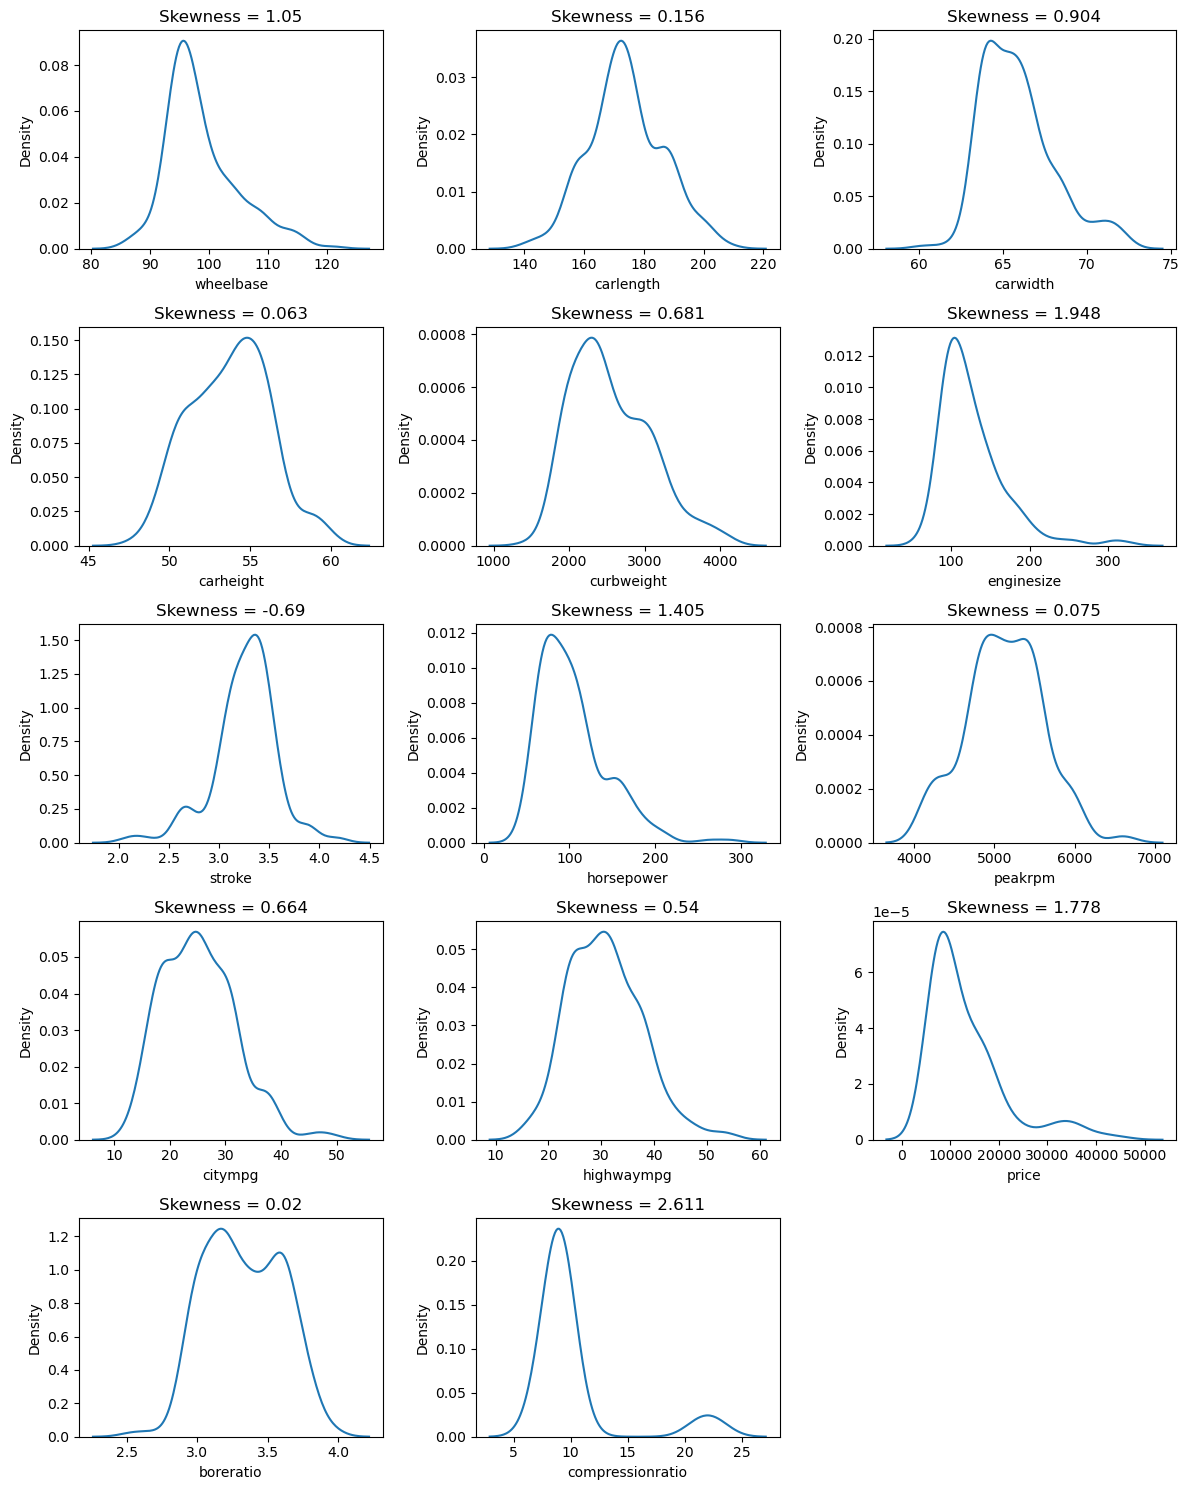

In [23]:
t=1
plt.figure(figsize=(12,15))
for i in num_cols:
    plt.subplot(5,3,t)
    sns.kdeplot(data[i])
    plt.title(f'Skewness = {round(data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

***`Inference`***
* There is `right skewness` in following columns:
  1. Wheelbase
  2. Carwidth
  3. Engine size
  4. Horsepower
  5. Price
  6. Compression ratio

* There is `left skewness` in following columns:
  1. Stroke

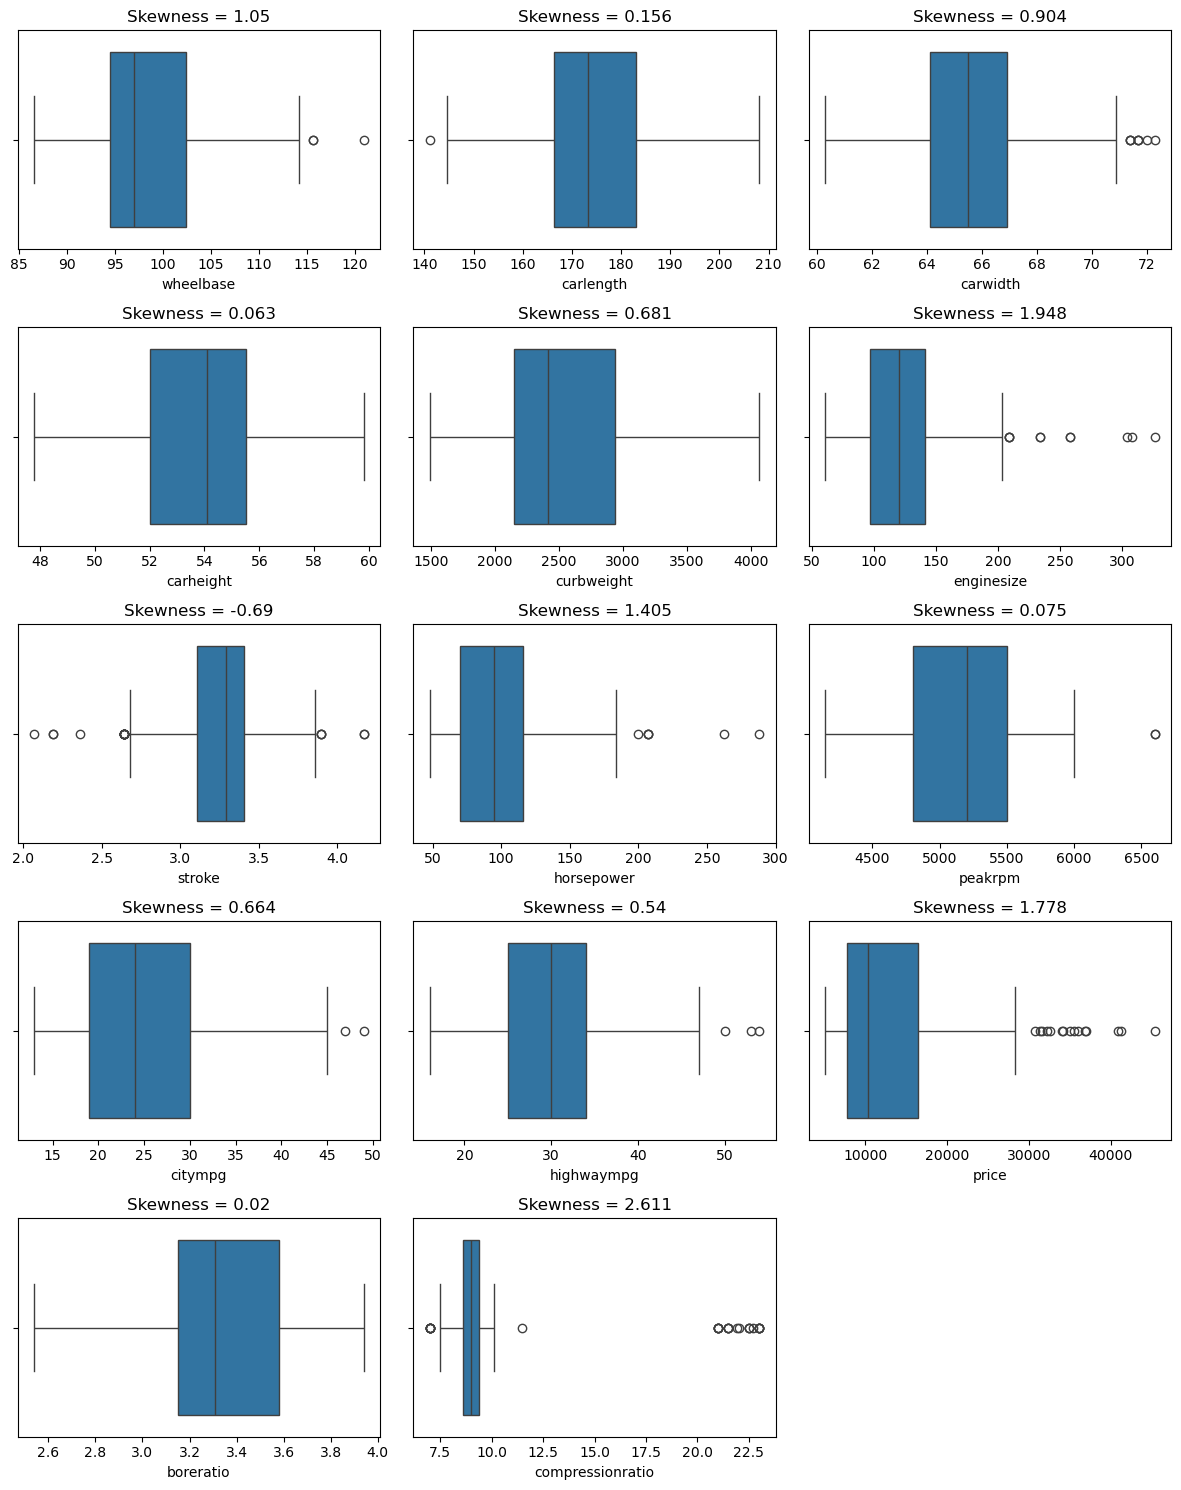

In [25]:
t=1
plt.figure(figsize=(12,15))
for i in num_cols:
    plt.subplot(5,3,t)
    sns.boxplot(data[i],orient='h')
    plt.title(f'Skewness = {round(data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

***Inference:***
* There is some right skewness in `wheelbase` , `carwidth` , `enginesize` , `horsepower` , `price` , `compression ratio`
* There is some left skewness in `Stroke`
* As we can see boxplot this skewness is due to some `extreme outliers` present in the data

### Categorical Analysis

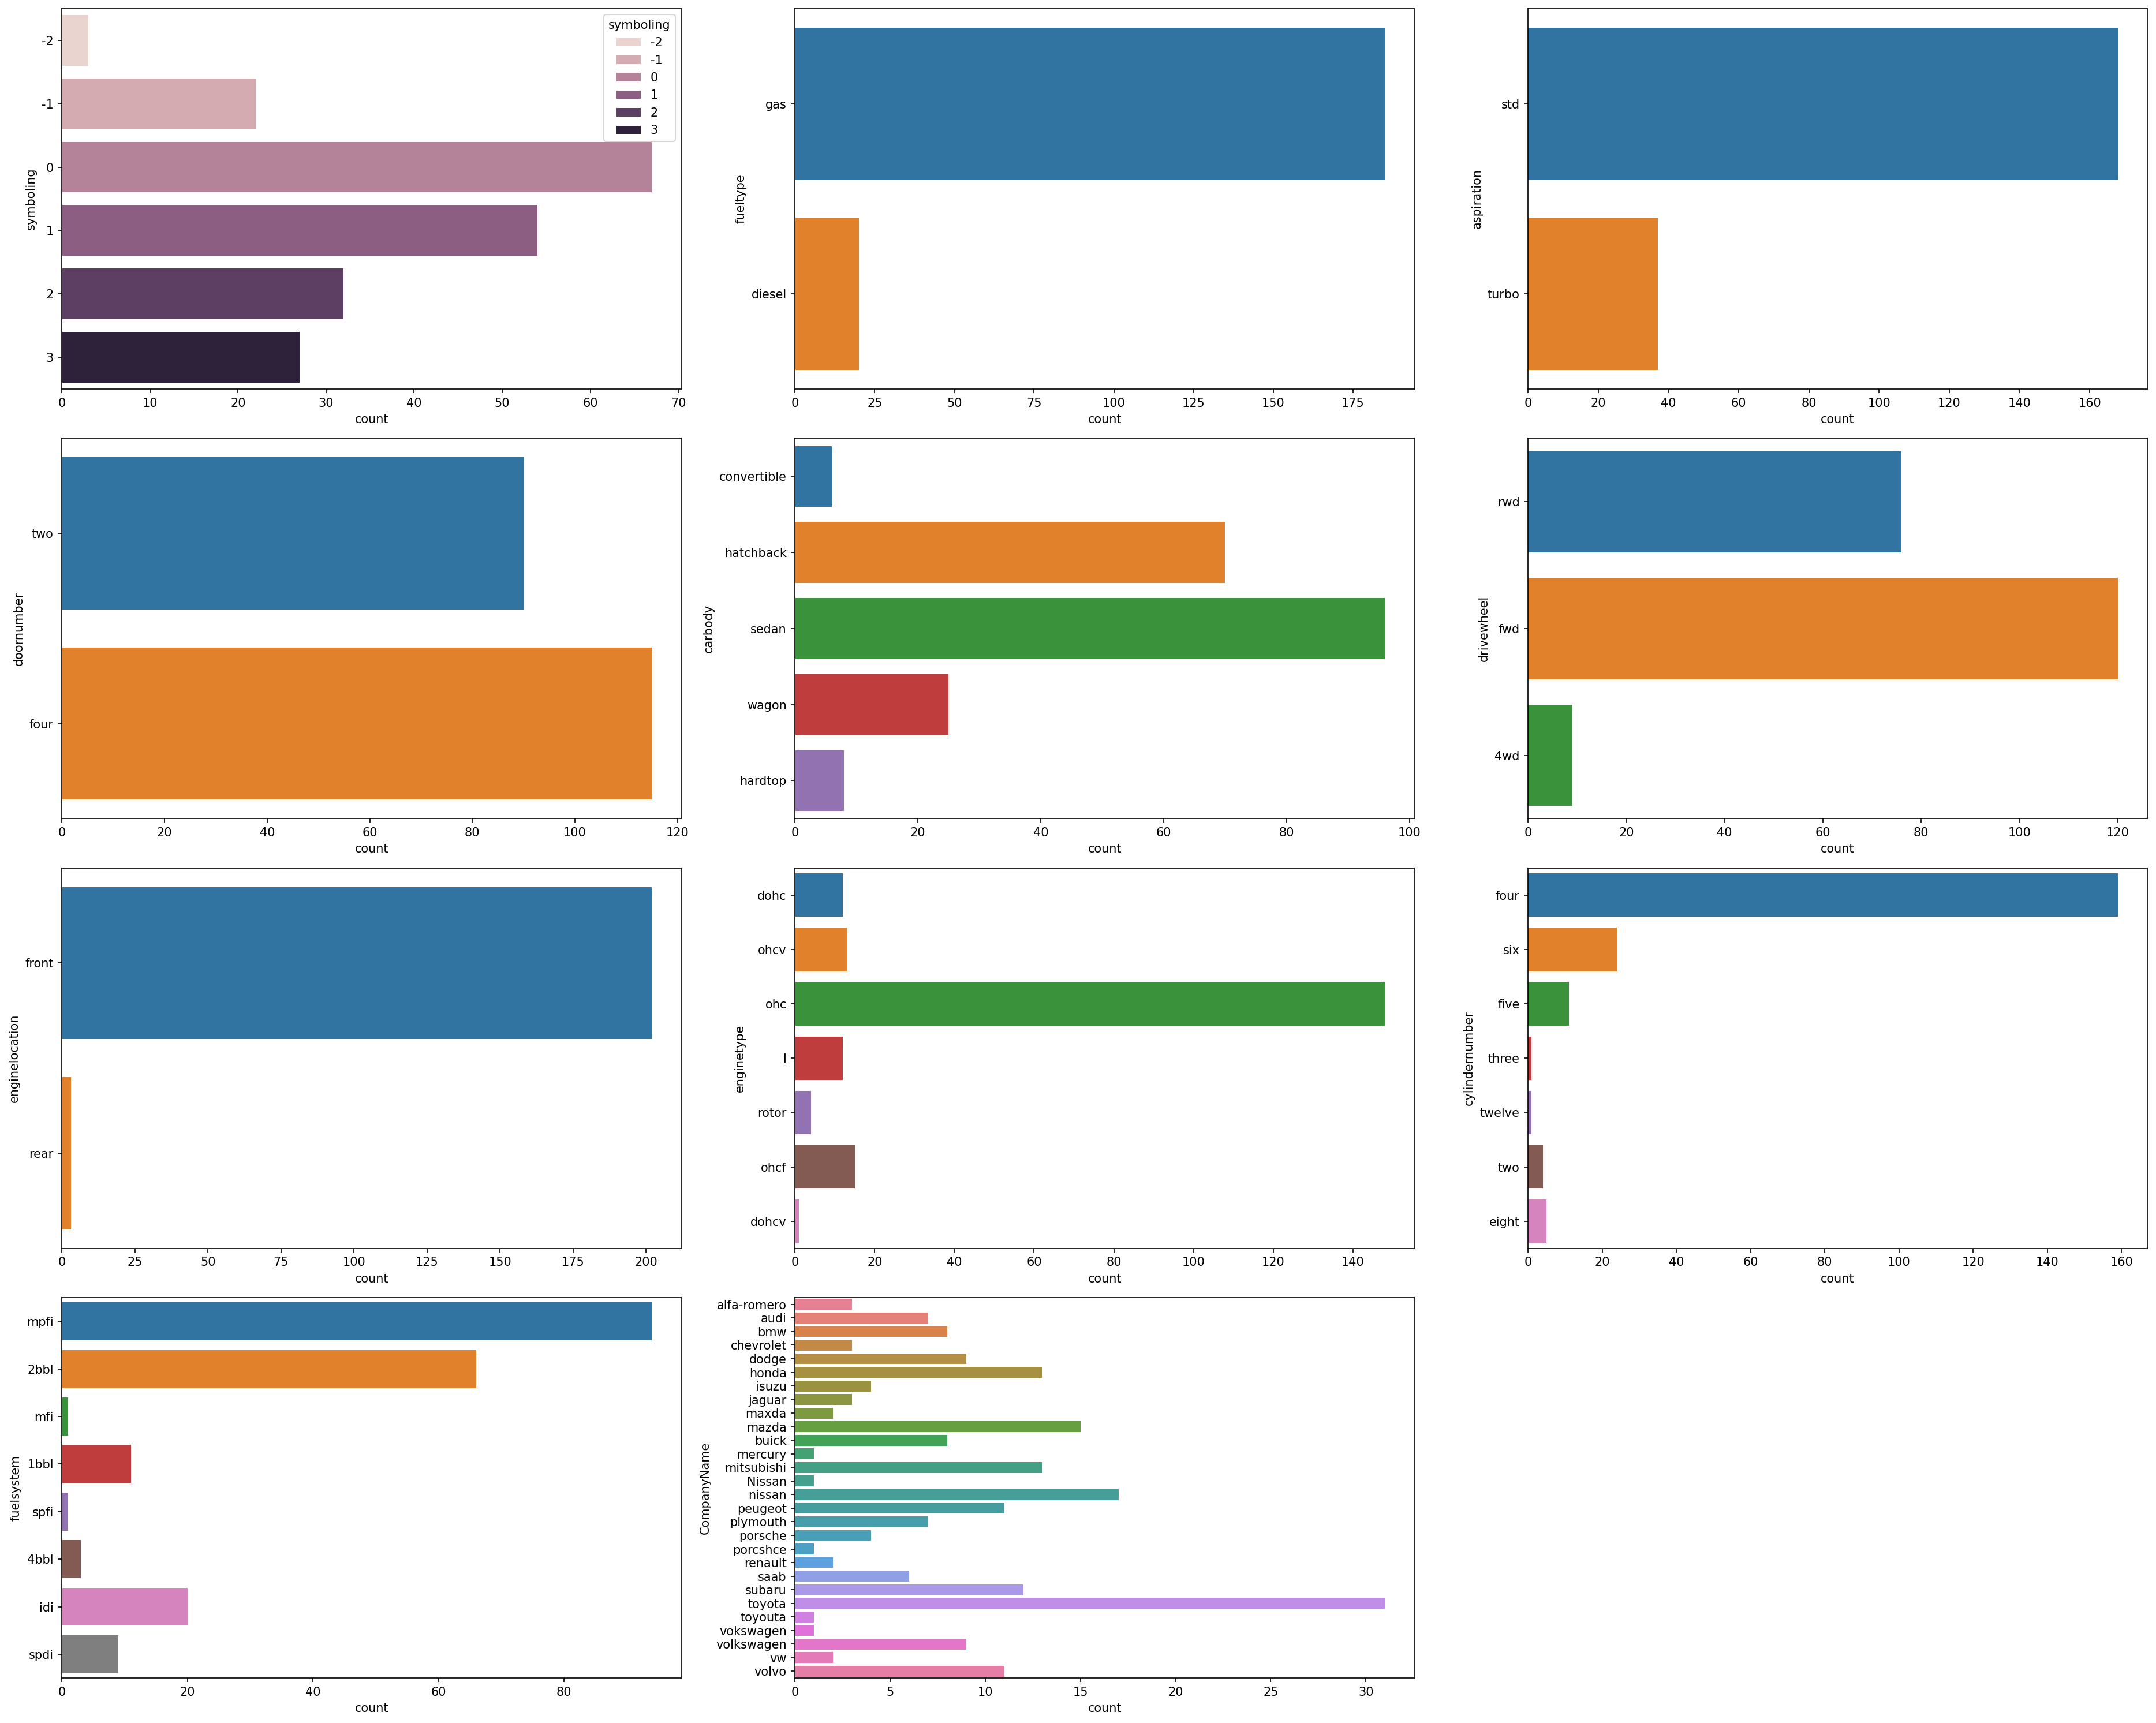

In [28]:
t=1
plt.figure(figsize=(25,20),dpi=150)
for i in cat_cols:
    plt.subplot(4,3,t)
    sns.countplot(data=data,y=i,hue=i)
    t=t+1
plt.tight_layout()
plt.show()

***Inference:***
* Most of the cars are of `Gas` fuel type
* Most of the cars are of `standerd natural aspirated` engine
* Maximum number of cars are `four door` cars
* Maximum number of cars are `sedan and hatchback` body type
* More than 60% cars are `fwd(Forward wheel Drive)`
* More than 90% cars have engine at their `front`
* Most cars have `ohc` engine type
* Most number of cars have `four cylinder` engine
* `mpfi` and `2bbl` are fuelsystem used by most of the cars
* Maximum Number of cars are sold are of company `Toyota`

## Bivariate Analysis

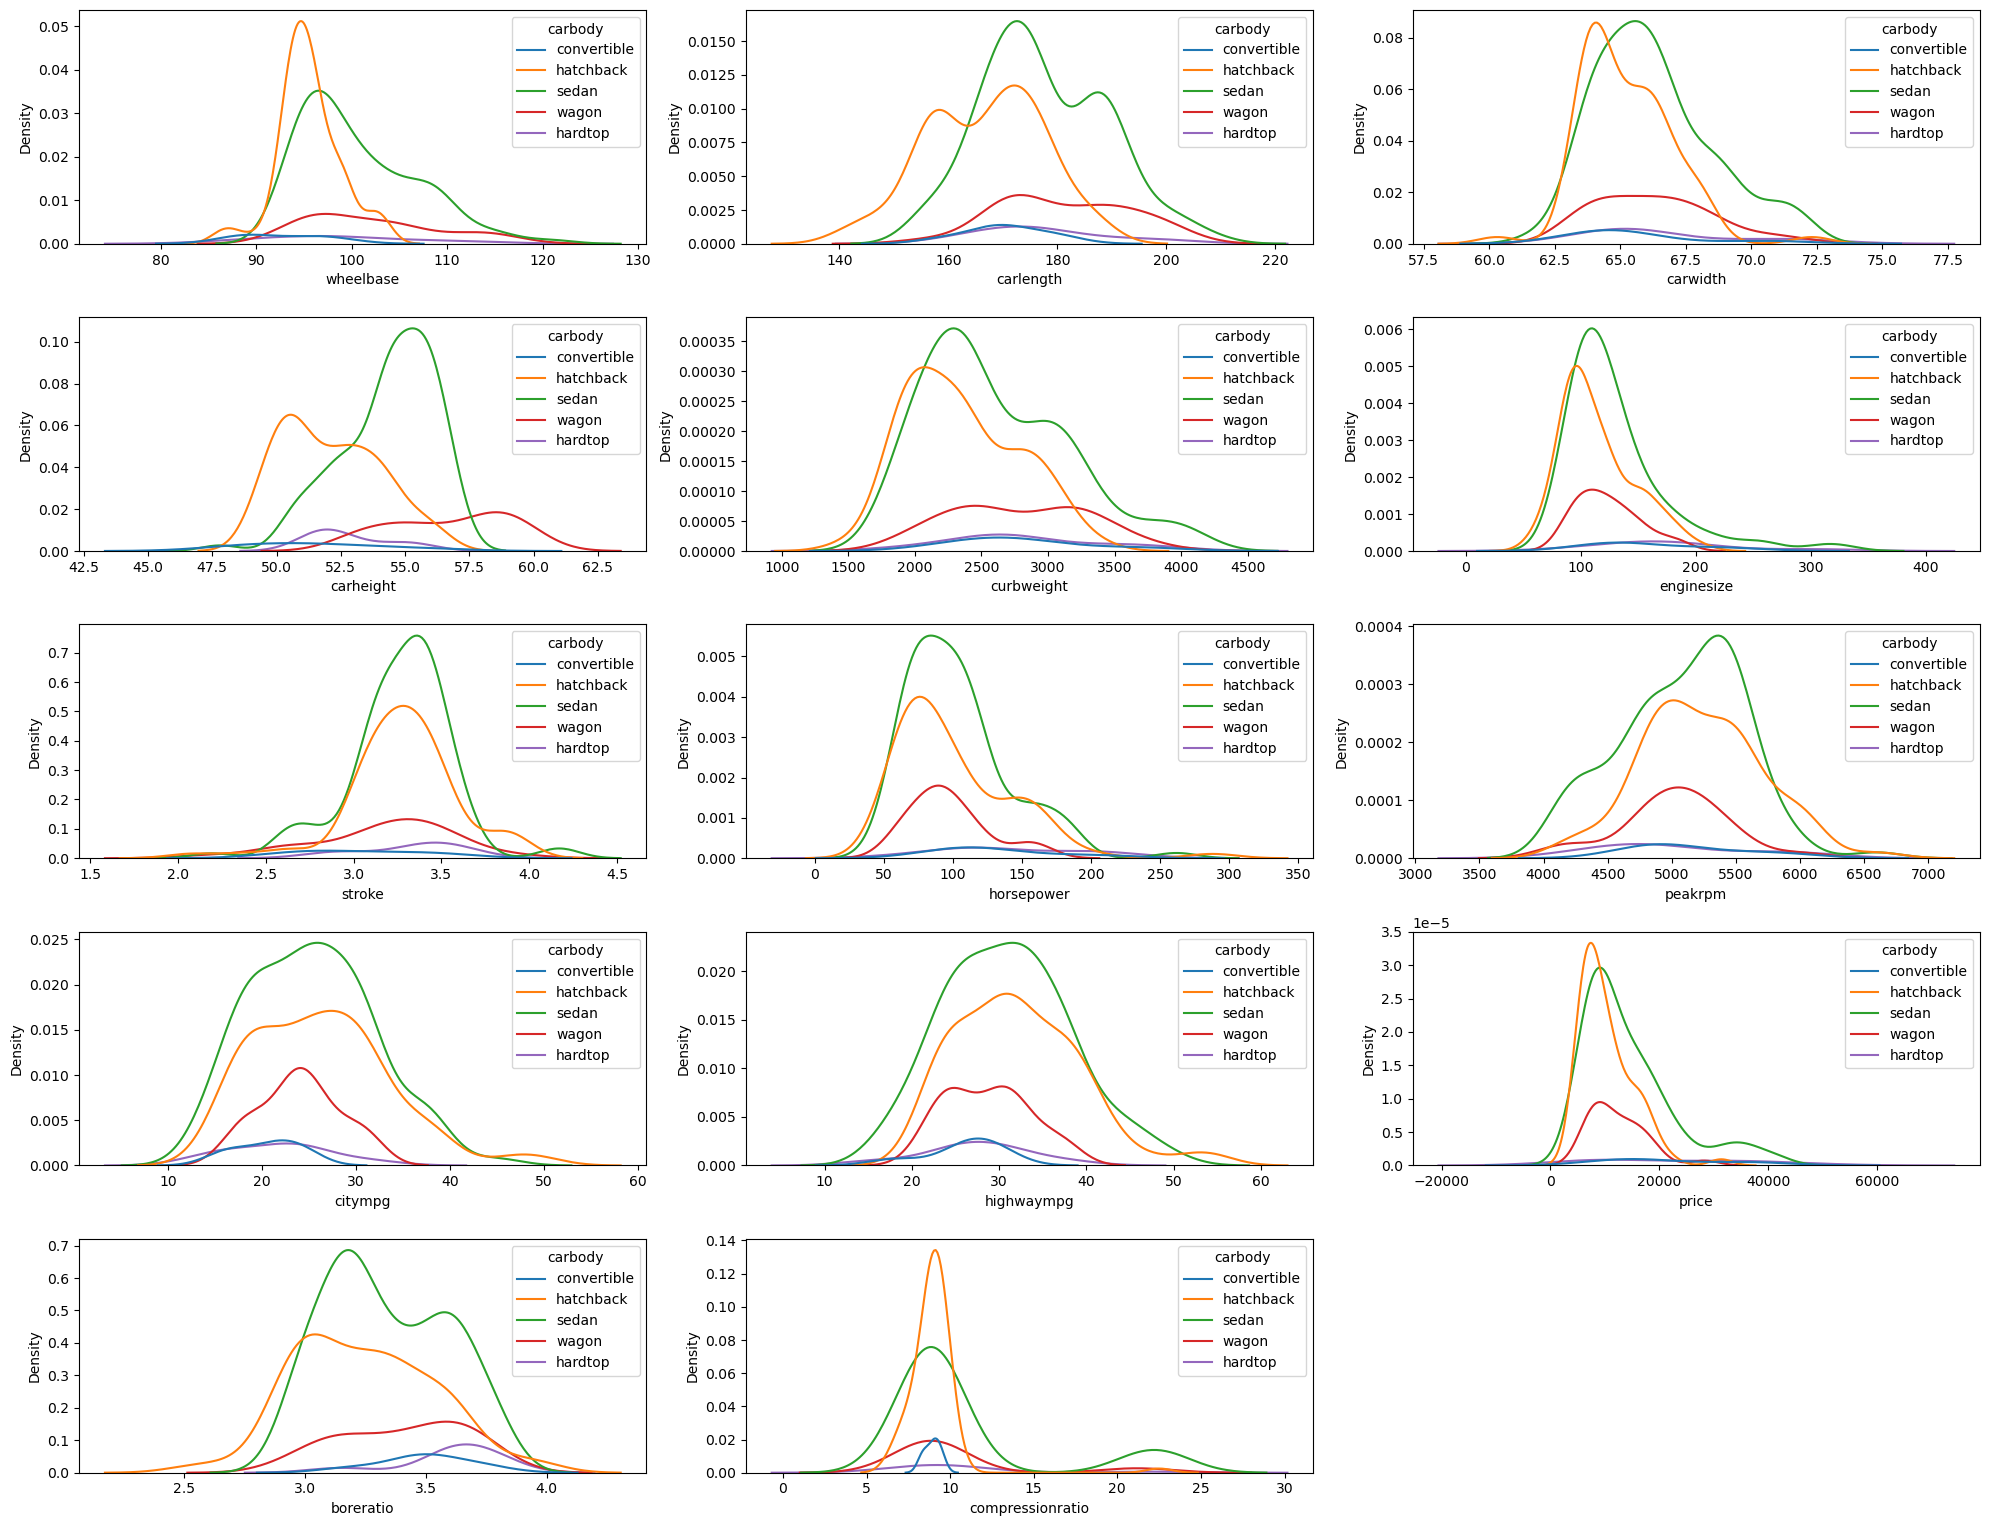

In [31]:
t=1
plt.figure(figsize=(20,18))
for i in num_cols:
    plt.subplot(6,3,t)
    sns.kdeplot(data=data,x=i,hue=data['carbody'])
    t=t+1
plt.tight_layout()
plt.show()

***`Inference: `***
* As we 

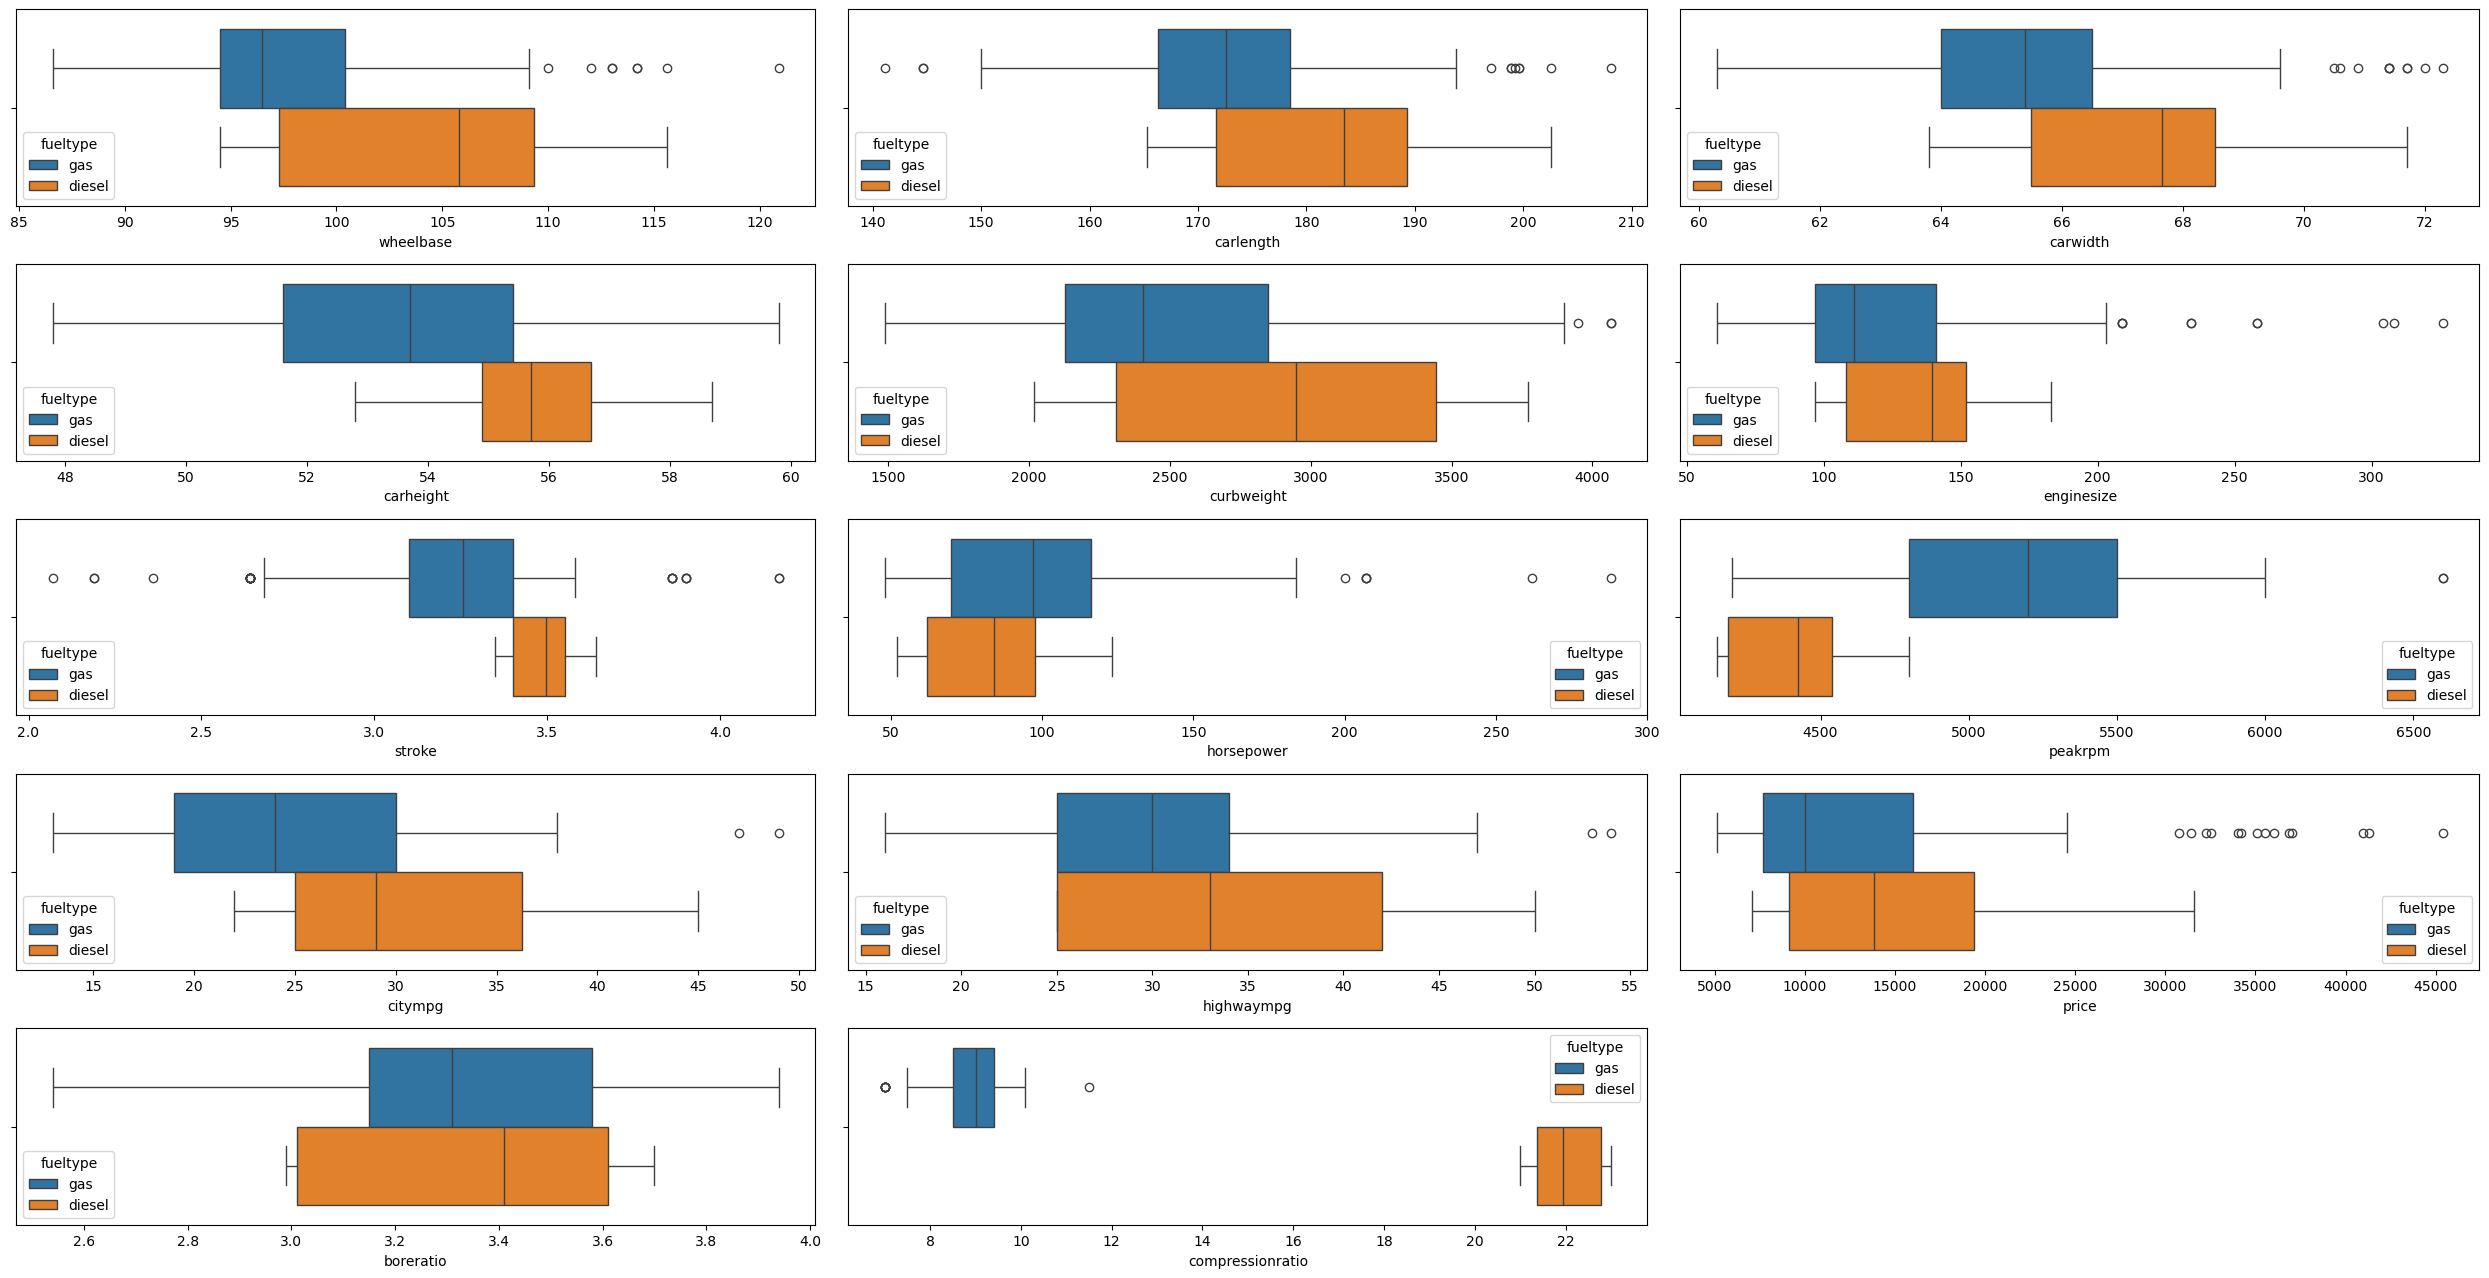

In [33]:
t=1
plt.figure(figsize=(25,15))
for i in num_cols:
    plt.subplot(6,3,t)
    sns.boxplot(data=data,x=i,hue=data['fueltype'],orient='h')
    t=t+1
plt.tight_layout()
plt.show()

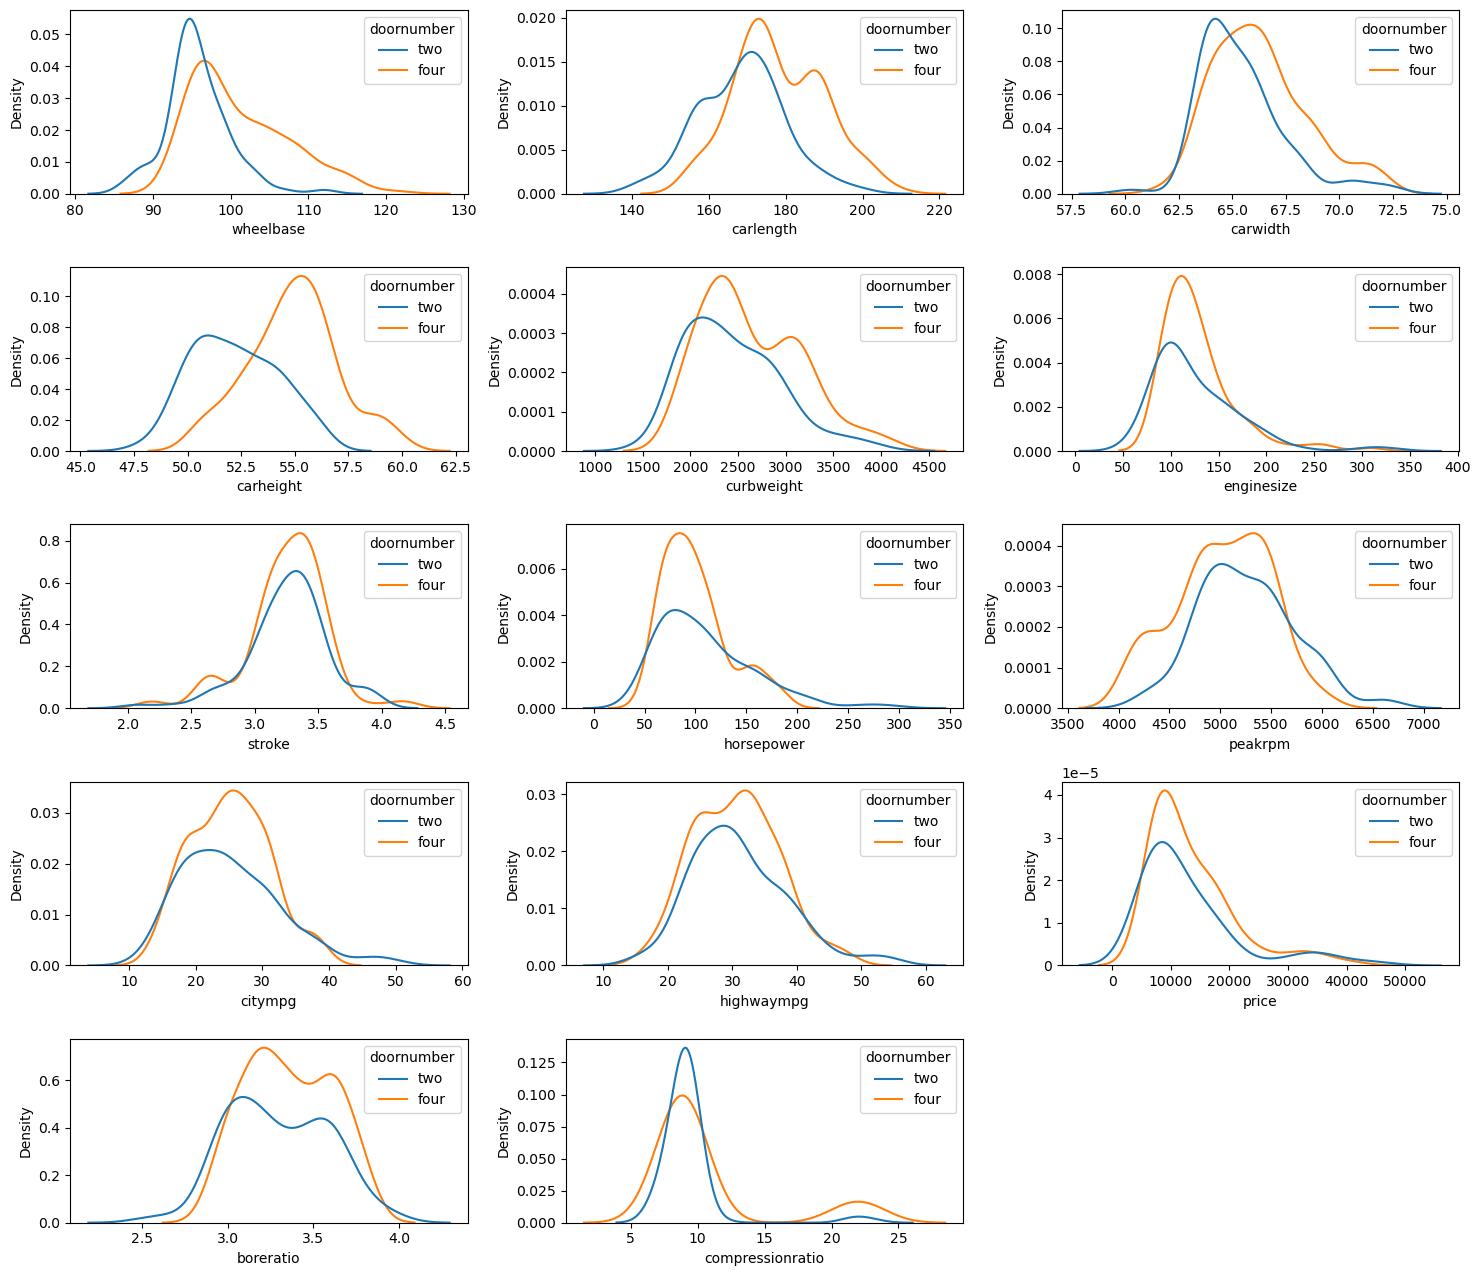

In [34]:
t=1
plt.figure(figsize=(15,15))
for i in num_cols:
    plt.subplot(6,3,t)
    sns.kdeplot(data=data,x=i,hue=data['doornumber'])
    t=t+1
plt.tight_layout()
plt.show()

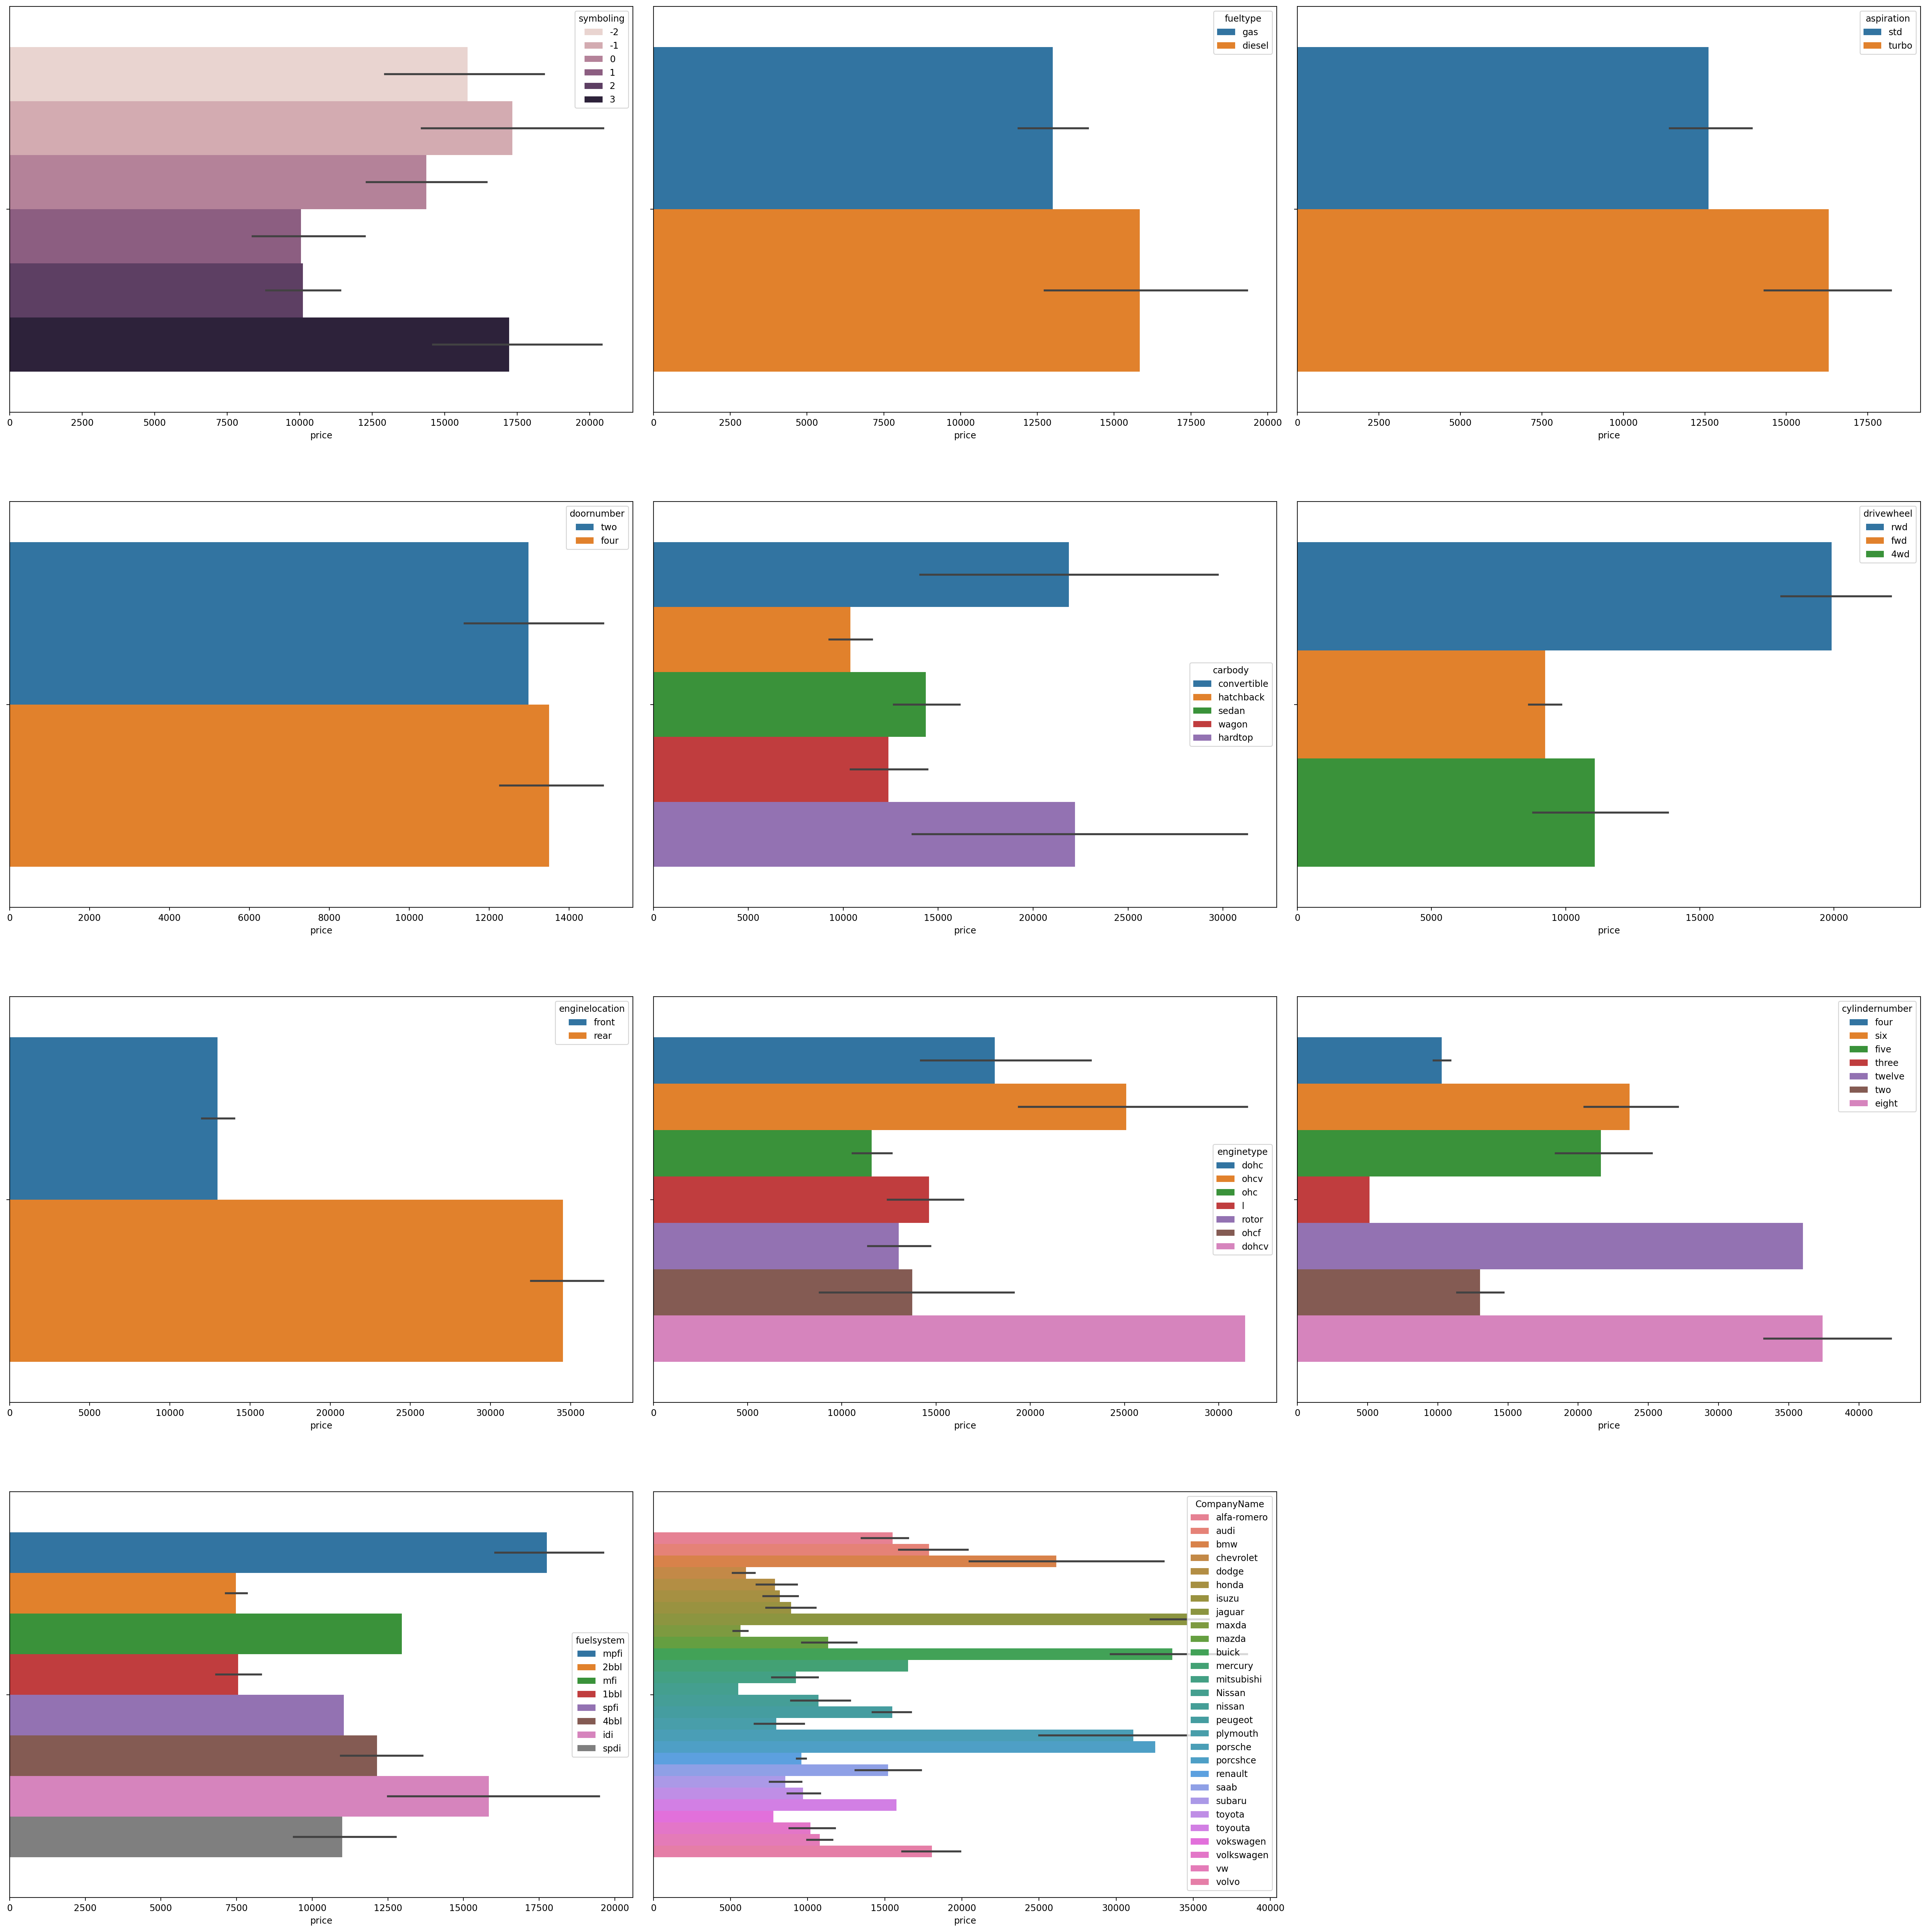

In [35]:
t=1
plt.figure(figsize=(30,45),dpi=200)
for i in cat_cols:
    plt.subplot(6,3,t)
    sns.barplot(data=data,x=data['price'],hue=i)
    t=t+1
plt.tight_layout()
plt.show()

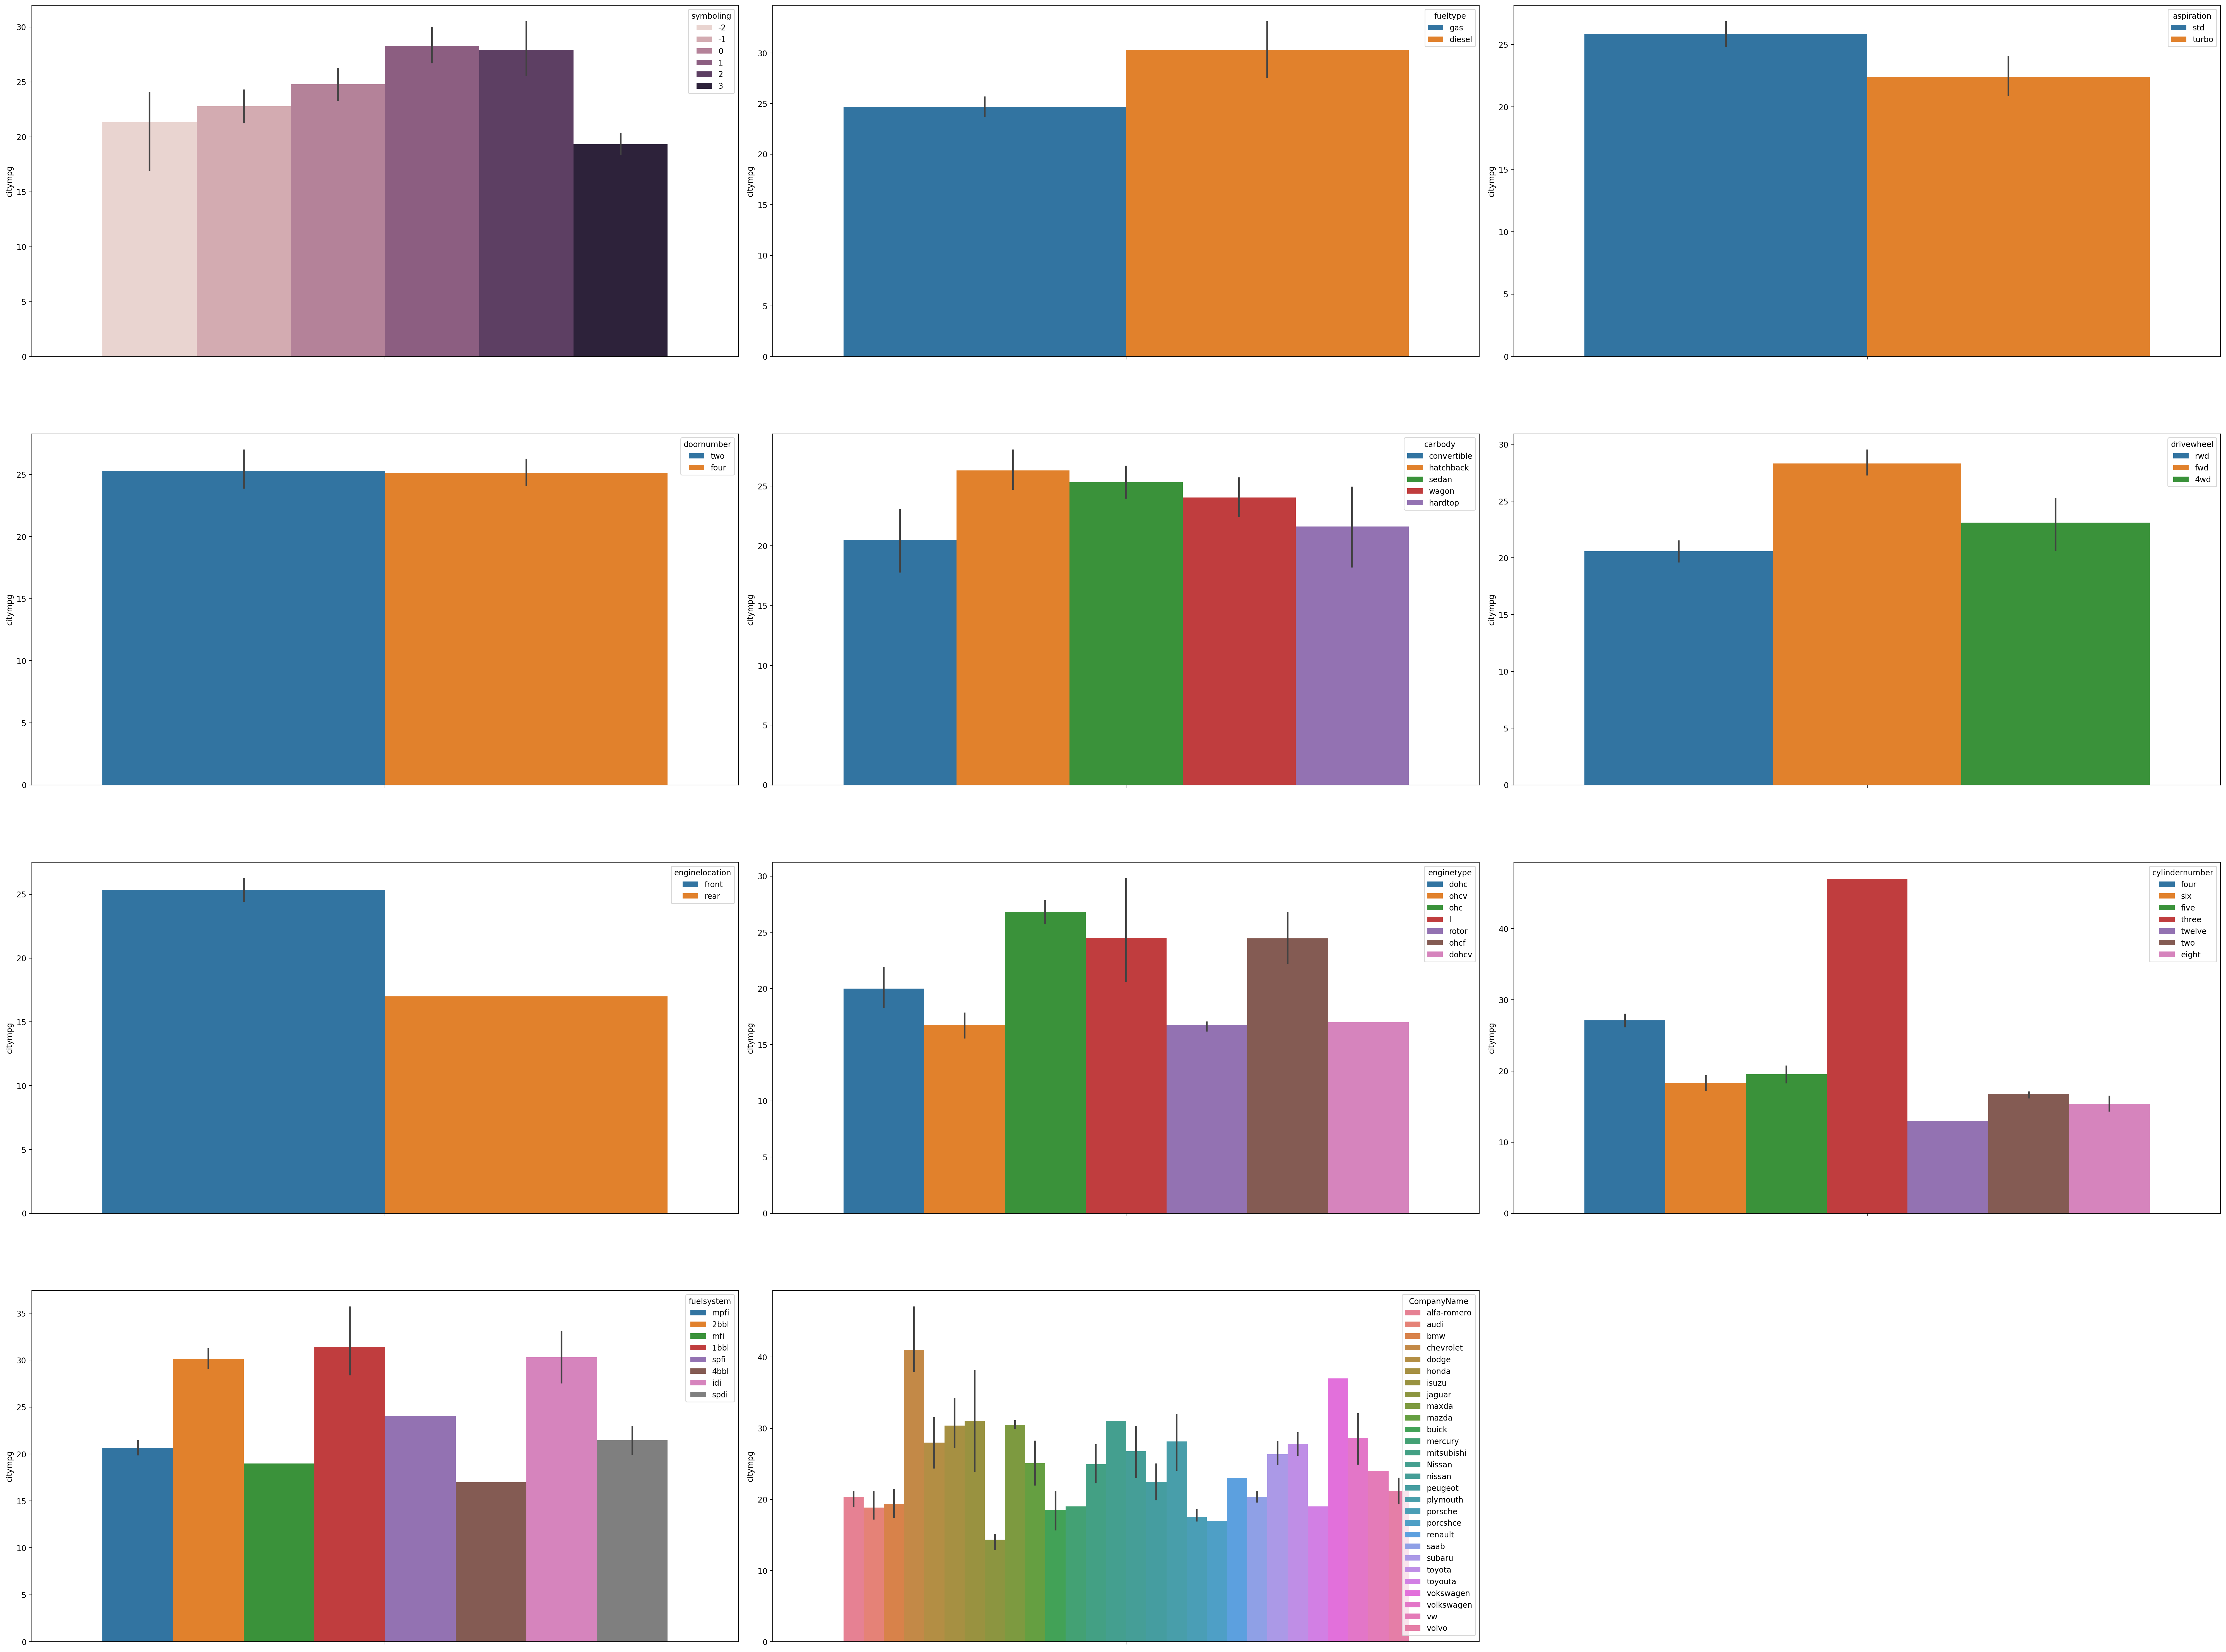

In [36]:
t=1
plt.figure(figsize=(40,45),dpi=200)
for i in cat_cols:
    plt.subplot(6,3,t)
    sns.barplot(data=data,y=data['citympg'],hue=i)
    t=t+1
plt.tight_layout()
plt.show()

# Inferential Statistics

# Data Preprocessing

#### Check for defects

In [40]:
data.isnull().sum().sum()

0

`Inference`: There are `no missing values` in the dataset

In [42]:
data[data.duplicated()]

Empty DataFrame
Columns: [symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, CompanyName]
Index: []

***`Inference:`***
* As there is no duplicate values 

In [44]:
for i in num_cols:
    q1,q3=np.percentile(data[i],[25,75])
    iqr=q3-q1
    ll,ul=q1-1.5*iqr,q3+1.5*iqr
    data[i]=data[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

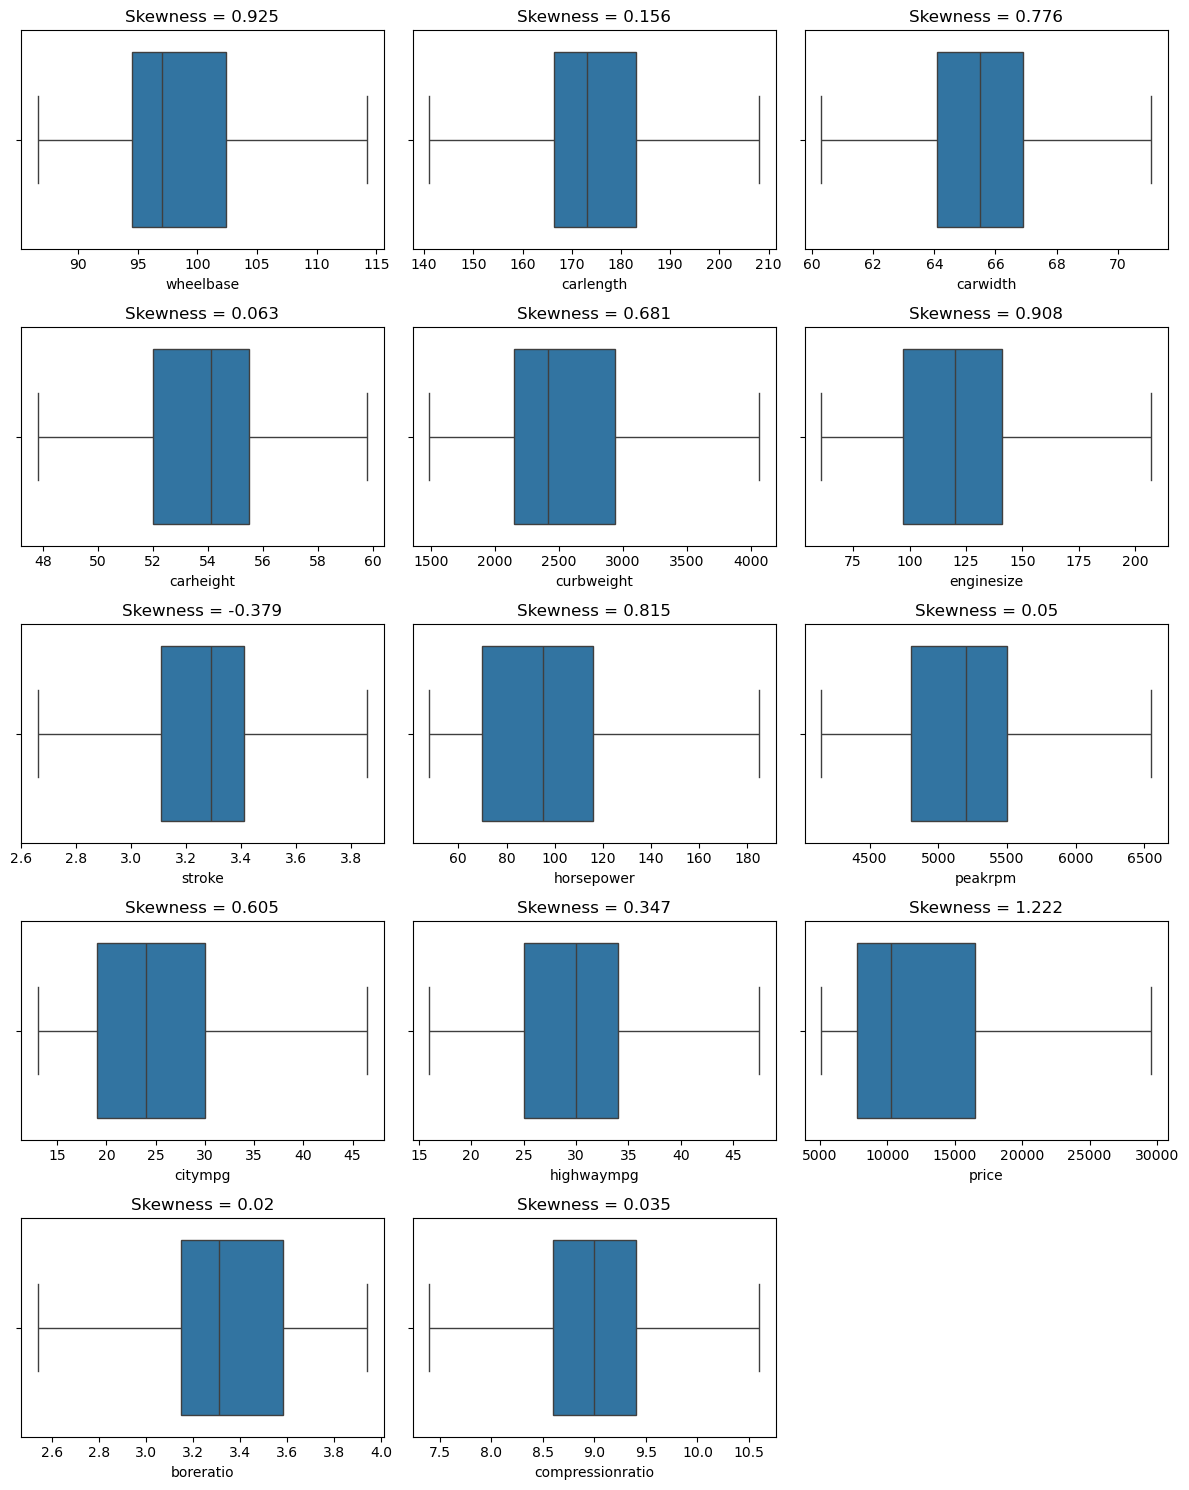

In [45]:
t=1
plt.figure(figsize=(12,15))
for i in num_cols:
    plt.subplot(5,3,t)
    sns.boxplot(data[i],orient='h')
    plt.title(f'Skewness = {round(data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

*Inference:* 
* we have `capped the extreme outliers`

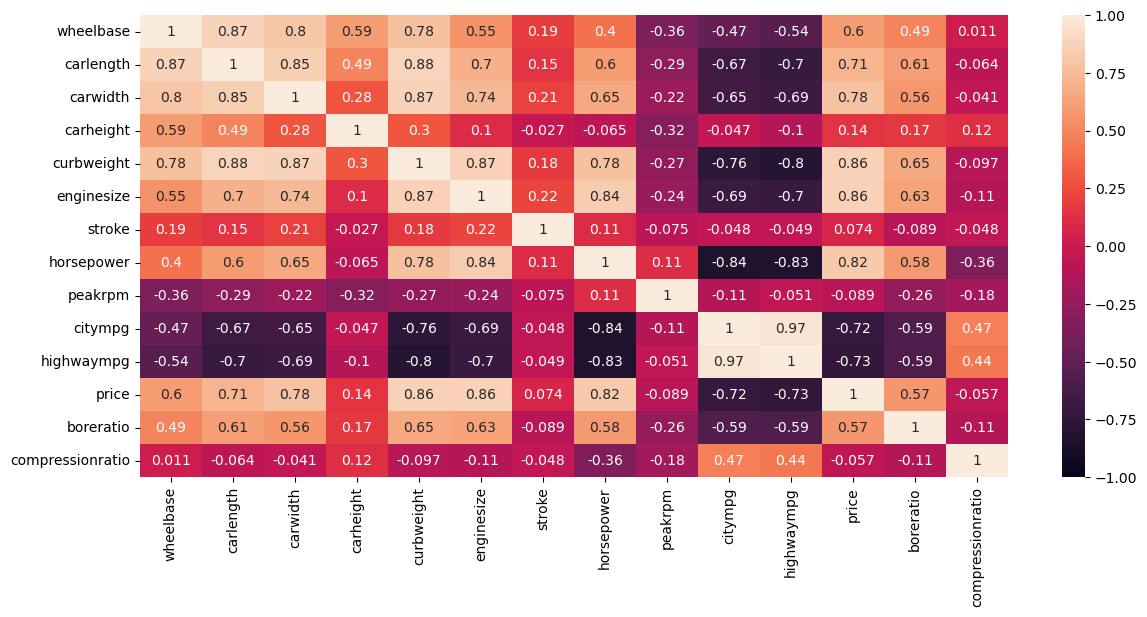

In [47]:
# we can make heatmap to find out most related columns with target variable
plt.figure(figsize=(14,6))
sns.heatmap(data[num_cols].corr(),vmin=-1,vmax=1,annot=True)
plt.show()

**Inference:**
* `Citympg and highwaympg` are highly correlated with target variable

In [49]:
data.drop(columns=['boreratio','compressionratio'],inplace=True)

**Inference:**
* Here we dropped `Boreratio,compressionratio` as there is no significant relation with `target variable`

# Encoding

### Ordinal Encoding

**Fueltype**

In [54]:
data['fueltype']=data['fueltype'].map({'gas':0,'diesel':1})

**Aspiration**

In [56]:
data['aspiration']=data['aspiration'].map({'std':0,'turbo':1})

**Doornumber**

In [58]:
data['doornumber']=data['doornumber'].map({'four':1,'two':0})

**Drivewheel**

In [60]:
data['drivewheel']=data['drivewheel'].map({'fwd':0,'rwd':1,'4wd':2})

**Enginelocation**

In [62]:
data['enginelocation']=data['enginelocation'].map({'front':0,'rear':1})

### Frequency Encoding

**Carbody**

In [65]:
car_dict=data['carbody'].value_counts(normalize=True).to_dict()
data['carbody']=data['carbody'].map(car_dict)

**Enginetype**

In [67]:
e_dict=data['enginetype'].value_counts(normalize=True).to_dict()
data['enginetype']=data['enginetype'].map(e_dict)

**Cylindernumber**

In [69]:
c_dict=data['cylindernumber'].value_counts(normalize=True).to_dict()
data['cylindernumber']=data['cylindernumber'].map(c_dict)

**Fuelsystem**

In [71]:
f_dict=data['fuelsystem'].value_counts(normalize=True).to_dict()
data['fuelsystem']=data['fuelsystem'].map(f_dict)

**CompanyName**

In [73]:
c_dict=data['CompanyName'].value_counts(normalize=True).to_dict()
data['CompanyName']=data['CompanyName'].map(c_dict)

In [74]:
data.dtypes

symboling           int64
fueltype            int64
aspiration          int64
doornumber          int64
carbody           float64
drivewheel          int64
enginelocation      int64
wheelbase         float64
carlength         float64
carwidth          float64
carheight         float64
curbweight          int64
enginetype        float64
cylindernumber    float64
enginesize        float64
fuelsystem        float64
stroke            float64
horsepower        float64
peakrpm           float64
citympg           float64
highwaympg        float64
price             float64
CompanyName       float64
dtype: object

In [75]:
data

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
car_ID                                                                     
1               3         0           0           0     0.03           1   
2               3         0           0           0     0.03           1   
3               1         0           0           0     0.34           1   
4               2         0           0           1     0.47           0   
5               2         0           0           1     0.47           2   
6               2         0           0           0     0.47           0   
7               1         0           0           1     0.47           0   
8               1         0           0           1     0.12           0   
9               1         0           1           1     0.47           0   
10              0         0           1           0     0.34           2   
11              2         0           0           0     0.47           1   
12              0         0           0           1     0.47           1   
13              0         0           0           0     0.47           1   
14              0         0           0           1     0.47           1   
15              1         0           0           1     0.47           1   
16              0         0           0           1     0.47           1   
17              0         0           0           0     0.47           1   
18              0         0           0           1     0.47           1   
19              2         0           0           0     0.34           0   
20              1         0           0           0     0.34           0   
21              0         0           0           1     0.47           0   
22              1         0           0           0     0.34           0   
23              1         0           0           0     0.34           0   
24              1         0           1           0     0.34           0   
25              1         0           0           1     0.34           0   
26              1         0           0           1     0.47           0   
27              1         0           0           1     0.47           0   
28              1         0           1           0     0.47           0   
29             -1         0           0           1     0.12           0   
30              3         0           1           0     0.34           0   
31              2         0           0           0     0.34           0   
32              2         0           0           0     0.34           0   
33              1         0           0           0     0.34           0   
34              1         0           0           0     0.34           0   
35              1         0           0           0     0.34           0   
36              0         0           0           1     0.47           0   
37              0         0           0           1     0.12           0   
38              0         0           0           0     0.34           0   
39              0         0           0           0     0.34           0   
40              0         0           0           1     0.47           0   
41              0         0           0           1     0.47           0   
42              0         0           0           1     0.47           0   
43              1         0           0           0     0.47           0   
44              0         0           0           1     0.47           1   
45              1         0           0           0     0.47           0   
46              0         0           0           1     0.47           0   
47              2         0           0           0     0.34           1   
48              0         0           0           1     0.47           1   
49              0         0           0           1     0.47           1   
50              0         0           0           0     0.47           1   
51              1         0           0           0     

# Train Test Split

In [77]:
x=data.drop(columns=['price'])
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(143, 22) (143,) (62, 22) (62,)


# Predictive Modelling

In [79]:
# Lists to store results for regression models
mod = []
r_squared = []
mae = []
mse = []
rmse = []
mape = []

# Regression model validation function
def regression_model_validation(model, xtrain, ytrain, xtest, ytest):
    # Step 1: Fit the model
    model.fit(xtrain, ytrain)
    
    # Step 2: Make predictions
    y_pred = model.predict(xtest)
    
    # Step 3: Calculate regression metrics
    r2 = r2_score(ytest, y_pred)
    mse_val = mean_squared_error(ytest, y_pred)
    mae_val = mean_absolute_error(ytest, y_pred)
    rmse_val = np.sqrt(mse_val)
    mape_val = mean_absolute_percentage_error(y_test,y_pred)
        
    # Print metrics
    print(f"R-Squared: {round(r2,2)}")
    print(f"Mean Absolute Error (MAE): {round(mae_val,2)}")
    print(f"Mean Squared Error (MSE): {round(mse_val,2)}")
    print(f"Root Mean Squared Error (RMSE): {round(rmse_val,2)}")
    print(f"Mean absolute percentage Error(MAPE) : {round(mape_val,2)}")
    
    # Step 4: Plot residuals
    residuals = ytest - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f'Residuals Plot')
    plt.show()
    
    # Step 5: Ask if user wants to save the result
    ans = input('Do you want to save the result? Y/N: ')
    if ans.lower() == 'y':
        mod.append(str(model))
        r_squared.append(r2)
        mae.append(mae_val)
        mse.append(mse_val)
        rmse.append(rmse_val)
        mape.append(mape_val)
        
        # Step 6: Update the scorecard with results
        global scorecard_reg
        scorecard_reg = pd.DataFrame({
            'Model': mod,
            'R-Squared': r_squared,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape})
        print("\nResults saved to regression scorecard!")
    else:
        return


In [80]:
def tuning_parameters(grid,estimator,x,y,score = 'r2'):
    gscv=GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## Linear Regression

R-Squared: 0.86
Mean Absolute Error (MAE): 1836.18
Mean Squared Error (MSE): 5206055.75
Root Mean Squared Error (RMSE): 2281.68
Mean absolute percentage Error(MAPE) : 0.15


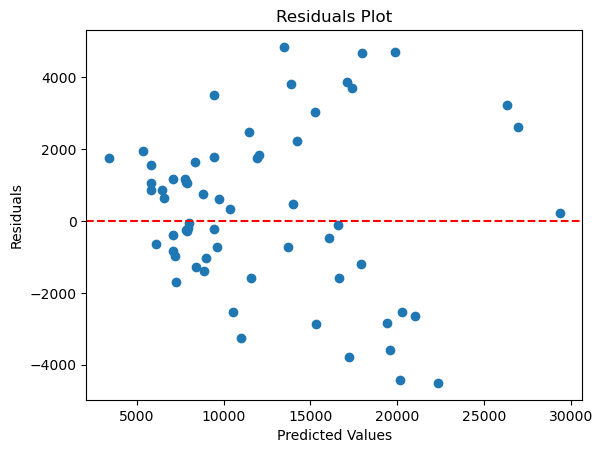

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [104]:
regression_model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

In [106]:
scorecard_reg

Model  R-Squared     MAE        MSE    RMSE  MAPE
0  LinearRegression()       0.86 1836.18 5206055.75 2281.68  0.15

## Decision Tree

R-Squared: 0.81
Mean Absolute Error (MAE): 1788.26
Mean Squared Error (MSE): 7106589.62
Root Mean Squared Error (RMSE): 2665.82
Mean absolute percentage Error(MAPE) : 0.14


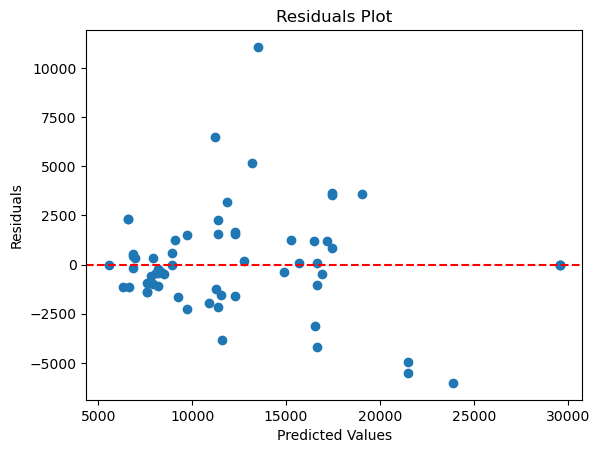

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [108]:
regression_model_validation(DecisionTreeRegressor(),x_train,y_train,x_test,y_test)

In [109]:
scorecard_reg

Model  R-Squared     MAE        MSE    RMSE  MAPE
0       LinearRegression()       0.86 1836.18 5206055.75 2281.68  0.15
1  DecisionTreeRegressor()       0.81 1788.26 7106589.62 2665.82  0.14

**With Fine Tuning**

In [111]:
best_dt = tuning_parameters(grid={'criterion' :["squared_error", "friedman_mse", "absolute_error","poisson"] ,
                                  'max_depth':range(1,11) ,'random_state':[1,2,3,4,5,6] },estimator=DecisionTreeRegressor() , 
                           x=x_train,y=y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [112]:
best_dt

{'criterion': 'absolute_error', 'max_depth': 9, 'random_state': 5}

R-Squared: 0.78
Mean Absolute Error (MAE): 1900.02
Mean Squared Error (MSE): 8315656.23
Root Mean Squared Error (RMSE): 2883.69
Mean absolute percentage Error(MAPE) : 0.14


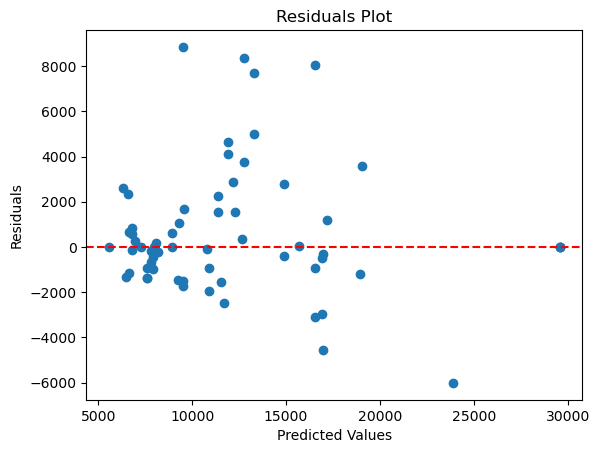

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [113]:
regression_model_validation(DecisionTreeRegressor(**best_dt),x_train,y_train,x_test,y_test)

In [114]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14

## Random Forest

R-Squared: 0.83
Mean Absolute Error (MAE): 1627.55
Mean Squared Error (MSE): 6298431.11
Root Mean Squared Error (RMSE): 2509.67
Mean absolute percentage Error(MAPE) : 0.12


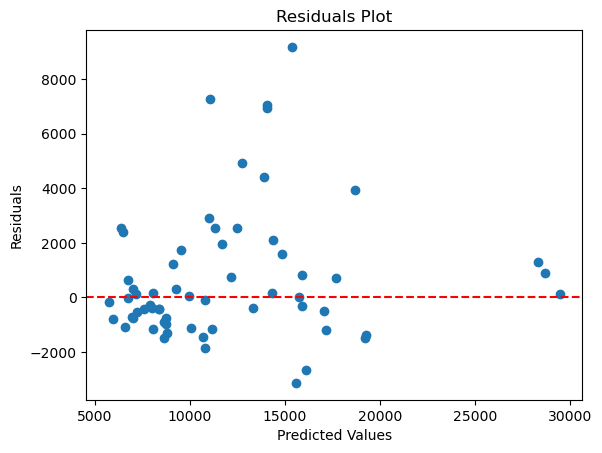

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [116]:
regression_model_validation(RandomForestRegressor(),x_train,y_train,x_test,y_test)

In [117]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12

**with Fine Tuning**

In [119]:
best_rf = tuning_parameters(grid={'n_estimators':[40,60,70,200,250] ,
                                  'max_depth':[6,7,8] ,'random_state':[3,4] ,'min_samples_split':[1,2]},
                           estimator=RandomForestRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [120]:
best_rf

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 40, 'random_state': 3}

R-Squared: 0.84
Mean Absolute Error (MAE): 1603.18
Mean Squared Error (MSE): 5990401.54
Root Mean Squared Error (RMSE): 2447.53
Mean absolute percentage Error(MAPE) : 0.12


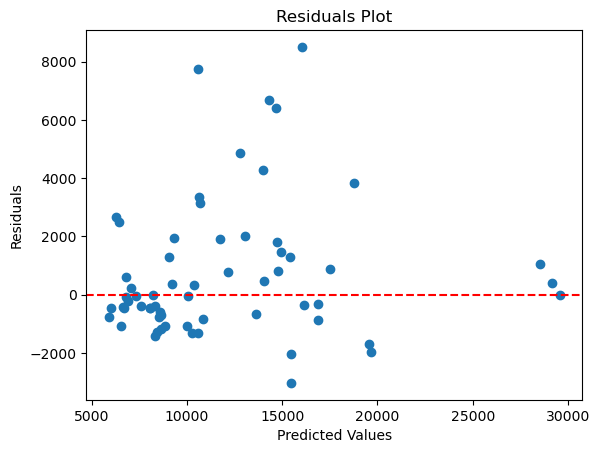

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [121]:
regression_model_validation(RandomForestRegressor(**best_rf),x_train,y_train,x_test,y_test)

In [122]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   
4  RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12  
4 5990401.54 2447.53  0.12

## Bagging

R-Squared: 0.83
Mean Absolute Error (MAE): 1637.4
Mean Squared Error (MSE): 6180521.13
Root Mean Squared Error (RMSE): 2486.07
Mean absolute percentage Error(MAPE) : 0.12


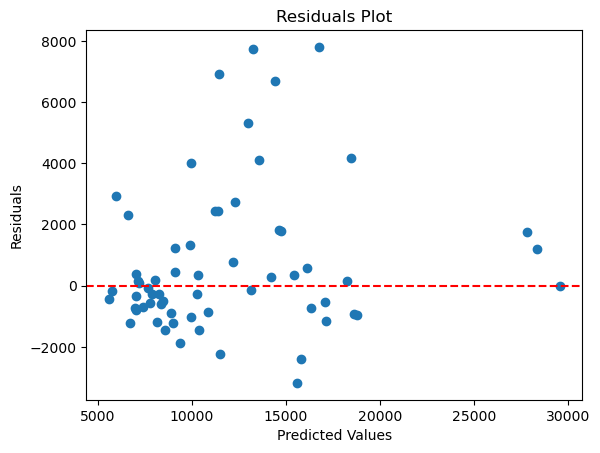

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [124]:
regression_model_validation(BaggingRegressor(),x_train,y_train,x_test,y_test)

In [125]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   
4  RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                 BaggingRegressor()       0.83 1637.40   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12  
4 5990401.54 2447.53  0.12  
5 6180521.13 2486.07  0.12

**with fine tuning**

In [127]:
best_bg = tuning_parameters(grid={'n_estimators':[30,40,50,45,55,65,60],
                                  'max_features':[5,6,7] ,'random_state':[4,5,6,7]},
                           estimator=BaggingRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [128]:
best_bg

{'max_features': 7, 'n_estimators': 50, 'random_state': 7}

R-Squared: 0.87
Mean Absolute Error (MAE): 1526.23
Mean Squared Error (MSE): 4898995.88
Root Mean Squared Error (RMSE): 2213.37
Mean absolute percentage Error(MAPE) : 0.12


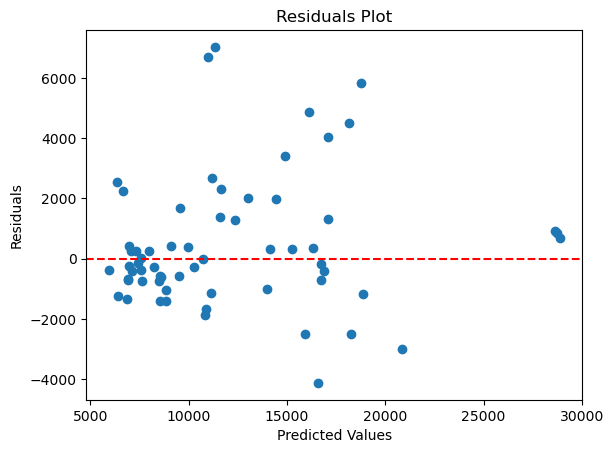

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [129]:
regression_model_validation(BaggingRegressor(**best_bg),x_train,y_train,x_test,y_test)

In [130]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   
4  RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                 BaggingRegressor()       0.83 1637.40   
6  BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12  
4 5990401.54 2447.53  0.12  
5 6180521.13 2486.07  0.12  
6 4898995.88 2213.37  0.12

## Ada Boost

R-Squared: 0.84
Mean Absolute Error (MAE): 1612.33
Mean Squared Error (MSE): 6044785.43
Root Mean Squared Error (RMSE): 2458.61
Mean absolute percentage Error(MAPE) : 0.13


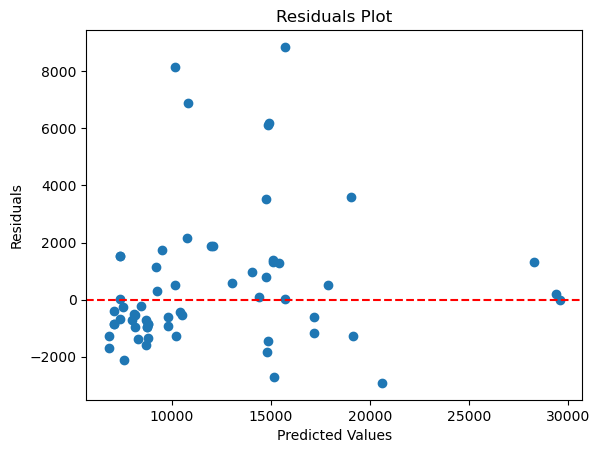

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [132]:
regression_model_validation(AdaBoostRegressor(),x_train,y_train,x_test,y_test)

In [133]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   
4  RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                 BaggingRegressor()       0.83 1637.40   
6  BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                AdaBoostRegressor()       0.84 1612.33   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12  
4 5990401.54 2447.53  0.12  
5 6180521.13 2486.07  0.12  
6 4898995.88 2213.37  0.12  
7 6044785.43 2458.61  0.13

In [134]:
best_ada = tuning_parameters(grid={'n_estimators':[60,80,100,120,150,200,250,300,350],
                                  'learning_rate':[0.001,0.05,0.01,0.2,0.4]},
                           estimator=AdaBoostRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [135]:
best_ada

{'learning_rate': 0.4, 'n_estimators': 120}

R-Squared: 0.84
Mean Absolute Error (MAE): 1599.68
Mean Squared Error (MSE): 5826020.33
Root Mean Squared Error (RMSE): 2413.72
Mean absolute percentage Error(MAPE) : 0.12


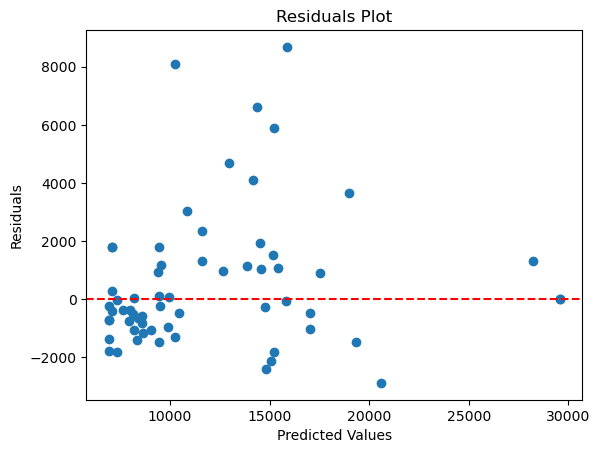

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [136]:
regression_model_validation(AdaBoostRegressor(**best_ada),x_train,y_train,x_test,y_test)

In [137]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   
4  RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                 BaggingRegressor()       0.83 1637.40   
6  BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                AdaBoostRegressor()       0.84 1612.33   
8  AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12  
4 5990401.54 2447.53  0.12  
5 6180521.13 2486.07  0.12  
6 4898995.88 2213.37  0.12  
7 6044785.43 2458.61  0.13  
8 5826020.33 2413.72  0.12

## Gradient Boost 

R-Squared: 0.86
Mean Absolute Error (MAE): 1475.45
Mean Squared Error (MSE): 5239619.66
Root Mean Squared Error (RMSE): 2289.02
Mean absolute percentage Error(MAPE) : 0.11


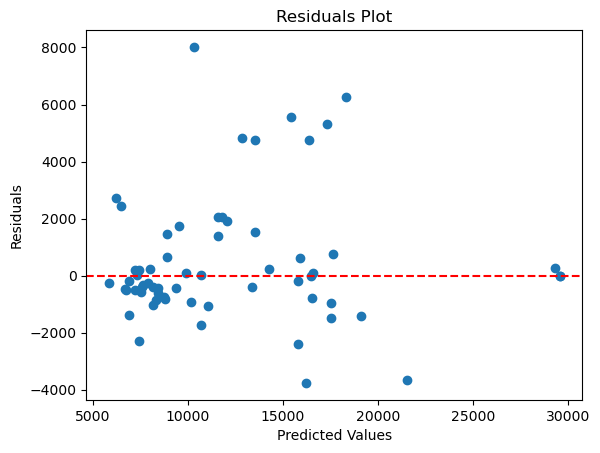

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [139]:
regression_model_validation(GradientBoostingRegressor(),x_train,y_train,x_test,y_test)

In [140]:
scorecard_reg

Model  R-Squared     MAE  \
0                                 LinearRegression()       0.86 1836.18   
1                            DecisionTreeRegressor()       0.81 1788.26   
2  DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                            RandomForestRegressor()       0.83 1627.55   
4  RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                 BaggingRegressor()       0.83 1637.40   
6  BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                AdaBoostRegressor()       0.84 1612.33   
8  AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                        GradientBoostingRegressor()       0.86 1475.45   

         MSE    RMSE  MAPE  
0 5206055.75 2281.68  0.15  
1 7106589.62 2665.82  0.14  
2 8315656.23 2883.69  0.14  
3 6298431.11 2509.67  0.12  
4 5990401.54 2447.53  0.12  
5 6180521.13 2486.07  0.12  
6 4898995.88 2213.37  0.12  
7 6044785.43 2458.61  0.13  
8 5826020.33 2413.72  0.12  
9 5239619.66 2289.02  0.11

**with fine tuning**

In [142]:
best_gbm = tuning_parameters(grid={'n_estimators':[80,100,120,150,200] ,
                                   'learning_rate':[0.05,0.1,0.3,0.7],
                                  'max_depth':[3,4,6,5,7]},
                           estimator=GradientBoostingRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [143]:
best_gbm

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}

R-Squared: 0.86
Mean Absolute Error (MAE): 1508.14
Mean Squared Error (MSE): 5371548.26
Root Mean Squared Error (RMSE): 2317.66
Mean absolute percentage Error(MAPE) : 0.12


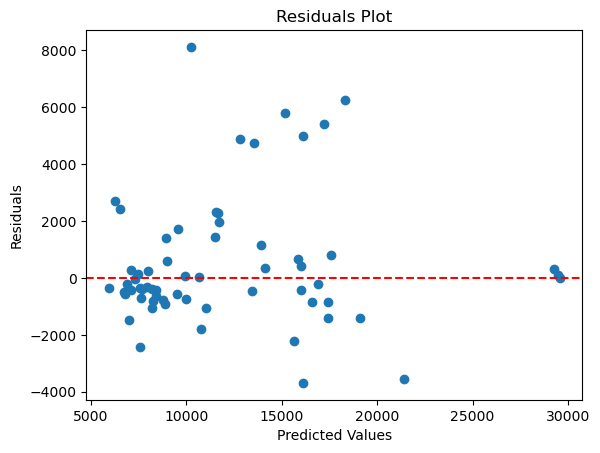

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [144]:
regression_model_validation(GradientBoostingRegressor(**best_gbm),x_train,y_train,x_test,y_test)

In [145]:
scorecard_reg

Model  R-Squared     MAE  \
0                                  LinearRegression()       0.86 1836.18   
1                             DecisionTreeRegressor()       0.81 1788.26   
2   DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                             RandomForestRegressor()       0.83 1627.55   
4   RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                  BaggingRegressor()       0.83 1637.40   
6   BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                 AdaBoostRegressor()       0.84 1612.33   
8   AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                         GradientBoostingRegressor()       0.86 1475.45   
10         GradientBoostingRegressor(n_estimators=80)       0.86 1508.14   

          MSE    RMSE  MAPE  
0  5206055.75 2281.68  0.15  
1  7106589.62 2665.82  0.14  
2  8315656.23 2883.69  0.14  
3  6298431.11 2509.67  0.12  
4  5990401.54 2447.53  0.12  
5  6180521.13 2486.07  0.12  
6  4898995.88 2213.37  0.12  
7  6044785.43 2458.61  0.13  
8  5826020.33 2413.72  0.12  
9  5239619.66 2289.02  0.11  
10 5371548.26 2317.66  0.12

## XGBoost

R-Squared: 0.83
Mean Absolute Error (MAE): 1506.97
Mean Squared Error (MSE): 6201451.61
Root Mean Squared Error (RMSE): 2490.27
Mean absolute percentage Error(MAPE) : 0.11


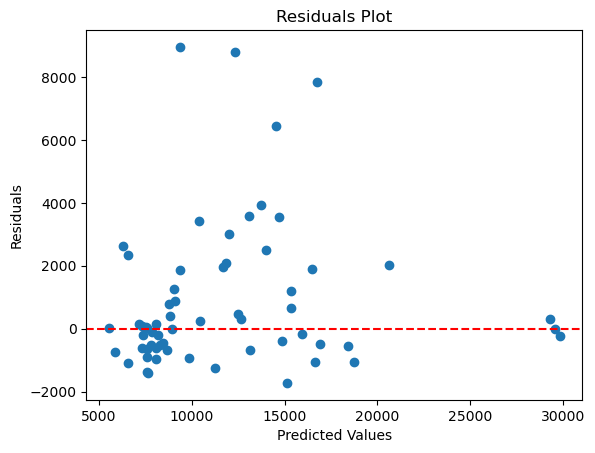

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [147]:
regression_model_validation(XGBRegressor(),x_train,y_train,x_test,y_test)

In [148]:
scorecard_reg

Model  R-Squared     MAE  \
0                                  LinearRegression()       0.86 1836.18   
1                             DecisionTreeRegressor()       0.81 1788.26   
2   DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                             RandomForestRegressor()       0.83 1627.55   
4   RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                  BaggingRegressor()       0.83 1637.40   
6   BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                 AdaBoostRegressor()       0.84 1612.33   
8   AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                         GradientBoostingRegressor()       0.86 1475.45   
10         GradientBoostingRegressor(n_estimators=80)       0.86 1508.14   
11  XGBRegressor(base_score=None, booster=None, ca...       0.83 1506.97   

          MSE    RMSE  MAPE  
0  5206055.75 2281.68  0.15  
1  7106589.62 2665.82  0.14  
2  8315656.23 2883.69  0.14  
3  6298431.11 2509.67  0.12  
4  5990401.54 2447.53  0.12  
5  6180521.13 2486.07  0.12  
6  4898995.88 2213.37  0.12  
7  6044785.43 2458.61  0.13  
8  5826020.33 2413.72  0.12  
9  5239619.66 2289.02  0.11  
10 5371548.26 2317.66  0.12  
11 6201451.61 2490.27  0.11

**with fine tuning**

In [150]:
best_xg = tuning_parameters(grid={'n_estimators':[150,200,250,300,350,400] ,
                                   'learning_rate':[0.05,0.01,0.07,0.001],
                                  'max_depth':[3,4] ,'min_child_weight':[4,5,6],
                                 'gamma':[1,2]},
                           estimator=XGBRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [151]:
best_xg

{'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 400}

R-Squared: 0.83
Mean Absolute Error (MAE): 1651.9
Mean Squared Error (MSE): 6408672.64
Root Mean Squared Error (RMSE): 2531.54
Mean absolute percentage Error(MAPE) : 0.12


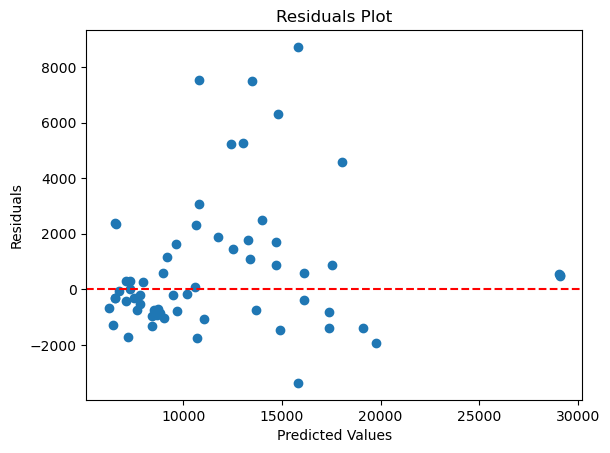

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [152]:
regression_model_validation(XGBRegressor(**best_xg),x_train,y_train,x_test,y_test)

In [153]:
scorecard_reg

Model  R-Squared     MAE  \
0                                  LinearRegression()       0.86 1836.18   
1                             DecisionTreeRegressor()       0.81 1788.26   
2   DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                             RandomForestRegressor()       0.83 1627.55   
4   RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                  BaggingRegressor()       0.83 1637.40   
6   BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                 AdaBoostRegressor()       0.84 1612.33   
8   AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                         GradientBoostingRegressor()       0.86 1475.45   
10         GradientBoostingRegressor(n_estimators=80)       0.86 1508.14   
11  XGBRegressor(base_score=None, booster=None, ca...       0.83 1506.97   
12  XGBRegressor(base_score=None, booster=None, ca...       0.83 1651.90   

          MSE    RMSE  MAPE  
0  5206055.75 2281.68  0.15  
1  7106589.62 2665.82  0.14  
2  8315656.23 2883.69  0.14  
3  6298431.11 2509.67  0.12  
4  5990401.54 2447.53  0.12  
5  6180521.13 2486.07  0.12  
6  4898995.88 2213.37  0.12  
7  6044785.43 2458.61  0.13  
8  5826020.33 2413.72  0.12  
9  5239619.66 2289.02  0.11  
10 5371548.26 2317.66  0.12  
11 6201451.61 2490.27  0.11  
12 6408672.64 2531.54  0.12

## Voting 

In [155]:
base_estimators = [('DT',DecisionTreeRegressor(**best_dt)),
                  ('RF',RandomForestRegressor(**best_rf)),
                  ('GBM',GradientBoostingRegressor(**best_gbm)),
                  ('XGB',XGBRegressor(**best_xg))] 

R-Squared: 0.84
Mean Absolute Error (MAE): 1560.6
Mean Squared Error (MSE): 5980845.83
Root Mean Squared Error (RMSE): 2445.58
Mean absolute percentage Error(MAPE) : 0.12


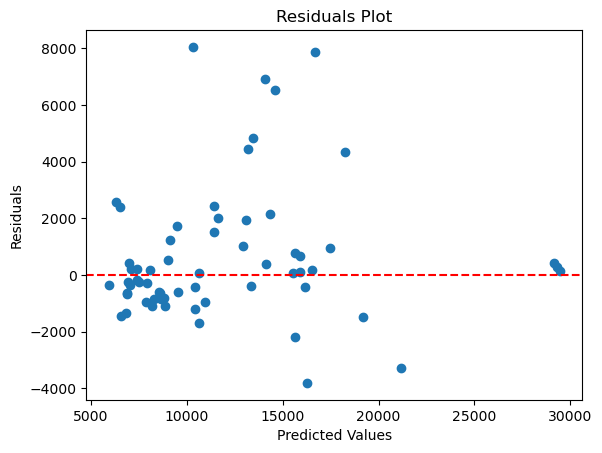

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [156]:
regression_model_validation(VotingRegressor(estimators=base_estimators),x_train,y_train,x_test,y_test)

In [157]:
scorecard_reg

Model  R-Squared     MAE  \
0                                  LinearRegression()       0.86 1836.18   
1                             DecisionTreeRegressor()       0.81 1788.26   
2   DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                             RandomForestRegressor()       0.83 1627.55   
4   RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                  BaggingRegressor()       0.83 1637.40   
6   BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                 AdaBoostRegressor()       0.84 1612.33   
8   AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                         GradientBoostingRegressor()       0.86 1475.45   
10         GradientBoostingRegressor(n_estimators=80)       0.86 1508.14   
11  XGBRegressor(base_score=None, booster=None, ca...       0.83 1506.97   
12  XGBRegressor(base_score=None, booster=None, ca...       0.83 1651.90   
13  VotingRegressor(estimators=[('DT',\n          ...       0.84 1560.60   

          MSE    RMSE  MAPE  
0  5206055.75 2281.68  0.15  
1  7106589.62 2665.82  0.14  
2  8315656.23 2883.69  0.14  
3  6298431.11 2509.67  0.12  
4  5990401.54 2447.53  0.12  
5  6180521.13 2486.07  0.12  
6  4898995.88 2213.37  0.12  
7  6044785.43 2458.61  0.13  
8  5826020.33 2413.72  0.12  
9  5239619.66 2289.02  0.11  
10 5371548.26 2317.66  0.12  
11 6201451.61 2490.27  0.11  
12 6408672.64 2531.54  0.12  
13 5980845.83 2445.58  0.12

## Stacking

R-Squared: 0.82
Mean Absolute Error (MAE): 1665.19
Mean Squared Error (MSE): 6566852.63
Root Mean Squared Error (RMSE): 2562.59
Mean absolute percentage Error(MAPE) : 0.13


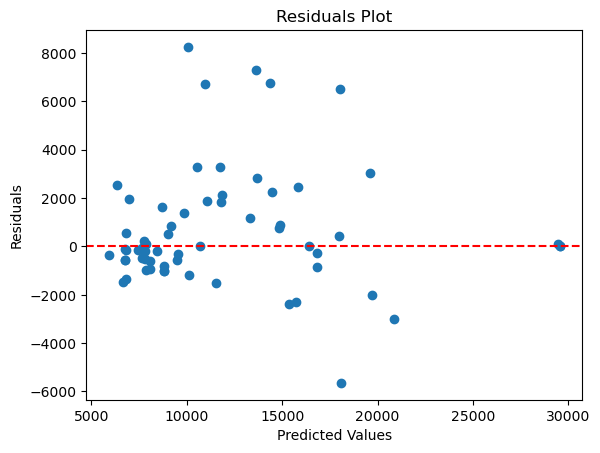

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [159]:
regression_model_validation(StackingRegressor(estimators=base_estimators,final_estimator=GradientBoostingRegressor()),
                            x_train,y_train,x_test,y_test)

In [160]:
scorecard_reg

Model  R-Squared     MAE  \
0                                  LinearRegression()       0.86 1836.18   
1                             DecisionTreeRegressor()       0.81 1788.26   
2   DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                             RandomForestRegressor()       0.83 1627.55   
4   RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                  BaggingRegressor()       0.83 1637.40   
6   BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                 AdaBoostRegressor()       0.84 1612.33   
8   AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                         GradientBoostingRegressor()       0.86 1475.45   
10         GradientBoostingRegressor(n_estimators=80)       0.86 1508.14   
11  XGBRegressor(base_score=None, booster=None, ca...       0.83 1506.97   
12  XGBRegressor(base_score=None, booster=None, ca...       0.83 1651.90   
13  VotingRegressor(estimators=[('DT',\n          ...       0.84 1560.60   
14  StackingRegressor(estimators=[('DT',\n        ...       0.82 1665.19   

          MSE    RMSE  MAPE  
0  5206055.75 2281.68  0.15  
1  7106589.62 2665.82  0.14  
2  8315656.23 2883.69  0.14  
3  6298431.11 2509.67  0.12  
4  5990401.54 2447.53  0.12  
5  6180521.13 2486.07  0.12  
6  4898995.88 2213.37  0.12  
7  6044785.43 2458.61  0.13  
8  5826020.33 2413.72  0.12  
9  5239619.66 2289.02  0.11  
10 5371548.26 2317.66  0.12  
11 6201451.61 2490.27  0.11  
12 6408672.64 2531.54  0.12  
13 5980845.83 2445.58  0.12  
14 6566852.63 2562.59  0.13

# Final Model

In [249]:
final_model = GradientBoostingRegressor(**best_ada)

In [251]:
final_model.fit(x_test,y_test)

GradientBoostingRegressor(learning_rate=0.4, n_estimators=120)

R-Squared: 0.88
Mean Absolute Error (MAE): 1445.97
Mean Squared Error (MSE): 4498677.23
Root Mean Squared Error (RMSE): 2121.01
Mean absolute percentage Error(MAPE) : 0.11


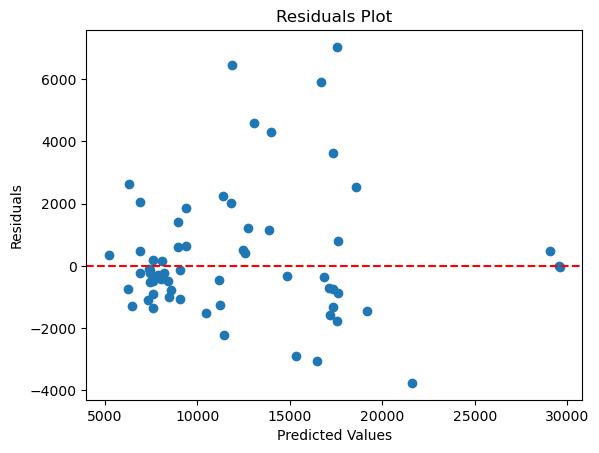

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [253]:
regression_model_validation(final_model,x_train,y_train,x_test,y_test)

In [255]:
scorecard_reg

Model  R-Squared     MAE  \
0                                  LinearRegression()       0.86 1836.18   
1                             DecisionTreeRegressor()       0.81 1788.26   
2   DecisionTreeRegressor(criterion='absolute_erro...       0.78 1900.02   
3                             RandomForestRegressor()       0.83 1627.55   
4   RandomForestRegressor(max_depth=6, n_estimator...       0.84 1603.18   
5                                  BaggingRegressor()       0.83 1637.40   
6   BaggingRegressor(max_features=7, n_estimators=...       0.87 1526.23   
7                                 AdaBoostRegressor()       0.84 1612.33   
8   AdaBoostRegressor(learning_rate=0.4, n_estimat...       0.84 1599.68   
9                         GradientBoostingRegressor()       0.86 1475.45   
10         GradientBoostingRegressor(n_estimators=80)       0.86 1508.14   
11  XGBRegressor(base_score=None, booster=None, ca...       0.83 1506.97   
12  XGBRegressor(base_score=None, booster=None, ca...       0.83 1651.90   
13  VotingRegressor(estimators=[('DT',\n          ...       0.84 1560.60   
14  StackingRegressor(estimators=[('DT',\n        ...       0.82 1665.19   
15  GradientBoostingRegressor(learning_rate=0.4, n...       0.88 1445.97   

          MSE    RMSE  MAPE  
0  5206055.75 2281.68  0.15  
1  7106589.62 2665.82  0.14  
2  8315656.23 2883.69  0.14  
3  6298431.11 2509.67  0.12  
4  5990401.54 2447.53  0.12  
5  6180521.13 2486.07  0.12  
6  4898995.88 2213.37  0.12  
7  6044785.43 2458.61  0.13  
8  5826020.33 2413.72  0.12  
9  5239619.66 2289.02  0.11  
10 5371548.26 2317.66  0.12  
11 6201451.61 2490.27  0.11  
12 6408672.64 2531.54  0.12  
13 5980845.83 2445.58  0.12  
14 6566852.63 2562.59  0.13  
15 4498677.23 2121.01  0.11

# Buisness Interpretation

In [257]:
fi = final_model.feature_importances_

In [258]:
fi_data = pd.DataFrame({'Feature Importance':fi},index=x_train.columns)\
.sort_values(by='Feature Importance',ascending=False)

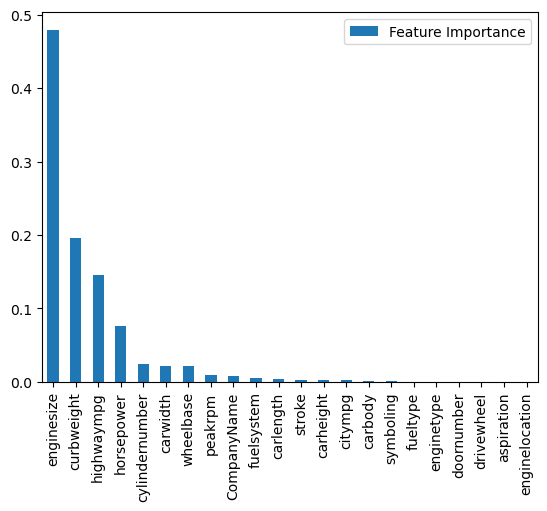

In [259]:
fi_data.plot(kind='bar')
plt.show()

**Inference**
* Price of a car is most effected by `Curbweight` & `EngineSize`

# Deployment

In [262]:
# Save the final model as a pickle file

with open('final_model_Gradient.pkl','wb') as file:
    pickle.dump(final_model,file)